# Basic Understanding of the Data

In this notebook, I am looking at the data that was gathered during my scraping. The overview of the purpose and conclusions are below. Take a look at Step 2 of my [project plan]([https://github.com/dtadmor/NBA-Player-Growth/blob/master/Project%20Outline.ipynb]) for some more details.

Goals:
- Make sure I understand all stats available.
- Look at the data to determine if Option 1, Option 2, or some other option would make most sense for the predictions.
- Look at the data to determine what measures to use for "expected valye" and "rates."
- Determine if I am missing necessary data.

Conclusions:
- Need more data for predicting shooting and driving.
- Drives can be valued using league tunrover and assist values.
- I will use Option 2 ("action" stats) combined with post-ups.

## Importing Libraries and Data

In [1]:
# Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
# Importing data sets
advanced = pd.read_csv('./data/general_advanced', index_col=0)
touches = pd.read_csv('./data/tracking_touches', index_col=0)
drives = pd.read_csv('./data/tracking_drives', index_col=0)
defensive_impact = pd.read_csv('./data/tracking_defensive_impact', index_col=0)
passing = pd.read_csv('./data/tracking_passing', index_col=0)
shooting_efficiency = pd.read_csv('./data/tracking_shooting_efficiency', index_col=0)
speed_distance = pd.read_csv('./data/tracking_speed_distance', index_col=0)
rebounding = pd.read_csv('./data/tracking_rebounding', index_col=0)
catch_shoot = pd.read_csv('./data/tracking_catch_shoot', index_col=0)
pullup_shooting = pd.read_csv('./data/tracking_pullup_shooting', index_col=0)
elbow_touches = pd.read_csv('./data/tracking_elbow_touches', index_col=0)
post_ups = pd.read_csv('./data/tracking_post_ups', index_col=0)
paint_touches = pd.read_csv('./data/tracking_paint_touches', index_col=0)
offensive_rebounding = pd.read_csv('./data/tracking_offensive_rebounding', index_col=0)
defensive_rebounding = pd.read_csv('./data/tracking_defensive_rebounding', index_col=0)
hustle = pd.read_csv('./data/hustle', index_col=0)
shooting_tight = pd.read_csv('./data/shooting_tight', index_col=0)
shooting_very_tight = pd.read_csv('./data/shooting_very_tight', index_col=0)
shooting_open = pd.read_csv('./data/shooting_open', index_col=0)
shooting_very_open = pd.read_csv('./data/shooting_very_open', index_col=0)
shooting_1_dribble = pd.read_csv('./data/shooting_1_dribble', index_col=0)
shooting_2_dribbles = pd.read_csv('./data/shooting_2_dribbles', index_col=0)
shooting_3_6_dribbles = pd.read_csv('./data/shooting_3_6_dribbles', index_col=0)
shooting_7_dribbles = pd.read_csv('./data/shooting_7_dribbles', index_col=0)

## Peeking at Stats Available
### Scoring Stats
Based on the information available in these scoring tables below, I will need more stats to be able to predict whichever ones I want to use.

In [3]:
shooting_efficiency.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   POINTS  DRIVE_PTS     ...      CATCH_SHOOT_FG_PCT  PULL_UP_PTS  \
0     2.3        0.8     ...                   0.500          0.8   
1    17.6        2.8     ...                   0.377          3.0   
2     6.7        0.9     ...                   0.222          1.2   
3     3.1        0.7     ...                   0.344          0.1   
4     4.2        0.4     ...                   0.600          0.4   

   PULL_UP_FG_PCT  PAINT_TOUCH_PTS  PAINT_TOUCH_FG_PCT  POST_TOUCH_PTS  \
0           0.375              0.0               0.000             0.0   
1           0.292              3.8               0.669             1.0   
2           0.238              0.4               1.000             0.0   
3           0.231              0.2               0.313             0.1   
4           0.500              1.0               1.000             0.4   

   POST_TOUCH_FG_PCT  ELBOW_TOUCH_PTS  ELBOW_TOUCH_FG_PCT  EFF_FG_PCT  
0              0.000              0.0               0.000       0.486  
1              0.397              1.2               0.547       0.500  
2              0.000              0.0               0.000       0.341  
3              0.000              0.0               0.000       0.413  
4              1.000              0.2               0.000       0.800  

[5 rows x 22 columns]

In [4]:
pullup_shooting.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   PULL_UP_FGM  PULL_UP_FGA  PULL_UP_FG_PCT  PULL_UP_FG3M  PULL_UP_FG3A  \
0          0.4          1.0           0.375           0.1           0.5   
1          1.3          4.4           0.292           0.4           1.8   
2          0.6          2.3           0.238           0.1           0.7   
3          0.1          0.3           0.231           0.0           0.0   
4          0.2          0.4           0.500           0.0           0.0   

   PULL_UP_FG3_PCT  PULL_UP_PTS  PULL_UP_EFG_PCT  
0            0.188          0.8            0.422  
1            0.217          3.0            0.337  
2            0.167          1.2            0.262  
3            0.500          0.1            0.269  
4            0.000          0.4            0.500

In [5]:
catch_shoot.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   CATCH_SHOOT_FGM  CATCH_SHOOT_FGA  CATCH_SHOOT_FG_PCT  CATCH_SHOOT_PTS  \
0              0.3              0.5               0.500              0.8   
1              1.8              4.7               0.377              5.1   
2              0.9              4.0               0.222              2.7   
3              0.5              1.4               0.344              1.4   
4              0.6              1.0               0.600              1.6   

   CATCH_SHOOT_FG3M  CATCH_SHOOT_FG3A  CATCH_SHOOT_FG3_PCT  \
0               0.3               0.5                0.533   
1               1.6               4.0                0.390   
2               0.9               4.0                0.222   
3               0.4               1.3                0.339   
4               0.4               0.6                0.667   

   CATCH_SHOOT_EFG_PCT  
0                0.750  
1                0.542  
2                0.333  
3                0.508  
4                0.800

In [6]:
drives.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   DRIVES  DRIVE_FGM      ...       DRIVE_PTS  DRIVE_PTS_PCT  DRIVE_PASSES  \
0     1.8        0.4      ...             0.8          0.482           0.6   
1     5.2        0.9      ...             2.8          0.538           1.2   
2     2.4        0.4      ...             0.9          0.364           0.7   
3     2.2        0.3      ...             0.7          0.311           0.6   
4     0.2        0.2      ...             0.4          2.000           0.0   

   DRIVE_PASSES_PCT  DRIVE_AST  DRIVE_AST_PCT  DRIVE_TOV  DRIVE_TOV_PCT  \
0             0.321        0.1          0.054        0.0          0.018   
1             0.233        0.3          0.066        0.5          0.093   
2             0.273        0.1          0.045        0.0          0.000   
3             0.291        0.2          0.078        0.3          0.117   
4             0.000        0.0          0.000        0.0          0.000   

   DRIVE_PF  DRIVE_PF_PCT  
0       0.1         0.036  
1       0.5         0.100  
2       0.0         0.000  
3       0.1         0.029  
4       0.0         0.000  

[5 rows x 25 columns]

In [7]:
post_ups.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   TOUCHES  POST_TOUCHES          ...           POST_TOUCH_PTS  \
0     12.6           0.0          ...                      0.0   
1     59.9           2.3          ...                      1.0   
2     29.2           0.0          ...                      0.0   
3     13.3           0.1          ...                      0.1   
4     12.4           0.6          ...                      0.4   

   POST_TOUCH_PTS_PCT  POST_TOUCH_PASSES  POST_TOUCH_PASSES_PCT  \
0               0.000                0.0                  0.000   
1               0.458                0.7                  0.290   
2               0.000                0.0                  0.000   
3               1.000                0.0                  0.000   
4               0.667                0.4                  0.667   

   POST_TOUCH_AST  POST_TOUCH_AST_PCT  POST_TOUCH_TOV  POST_TOUCH_TOV_PCT  \
0             0.0               0.000             0.0               0.000   
1             0.1               0.061             0.1               0.038   
2             0.0               0.000             0.0               0.000   
3             0.0               0.000             0.0               0.000   
4             0.0               0.000             0.0               0.000   

   POST_TOUCH_FOULS  POST_TOUCH_FOULS_PCT  
0               0.0                 0.000  
1               0.1                 0.061  
2               0.0                 0.000  
3               0.0                 0.667  
4               0.0                 0.000  

[5 rows x 26 columns]

In [8]:
paint_touches.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   TOUCHES  PAINT_TOUCHES          ...            PAINT_TOUCH_PTS  \
0     12.6            0.1          ...                        0.0   
1     59.9            3.9          ...                        3.8   
2     29.2            0.3          ...                        0.4   
3     13.3            0.5          ...                        0.2   
4     12.4            1.0          ...                        1.0   

   PAINT_TOUCH_PTS_PCT  PAINT_TOUCH_PASSES  PAINT_TOUCH_PASSES_PCT  \
0                0.000                 0.1                   1.000   
1                0.974                 0.8                   0.210   
2                1.333                 0.1                   0.333   
3                0.455                 0.1                   0.273   
4                1.000                 0.4                   0.400   

   PAINT_TOUCH_AST  PAINT_TOUCH_AST_PCT  PAINT_TOUCH_TOV  PAINT_TOUCH_TOV_PCT  \
0              0.1                0.667              0.0                0.000   
1              0.1                0.035              0.2                0.039   
2              0.0                0.000              0.0                0.000   
3              0.0                0.091              0.0                0.000   
4              0.0                0.000              0.0                0.000   

   PAINT_TOUCH_FOULS  PAINT_TOUCH_FOULS_PCT  
0                0.0                  0.000  
1                0.3                  0.066  
2                0.0                  0.000  
3                0.0                  0.000  
4                0.2                  0.200  

[5 rows x 26 columns]

In [9]:
elbow_touches.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   TOUCHES  ELBOW_TOUCHES        ...          ELBOW_TOUCH_FTM  \
0     12.6            0.0        ...                      0.0   
1     59.9            1.8        ...                      0.1   
2     29.2            1.0        ...                      0.0   
3     13.3            0.1        ...                      0.0   
4     12.4            1.0        ...                      0.2   

   ELBOW_TOUCH_FTA  ELBOW_TOUCH_FT_PCT  ELBOW_TOUCH_PTS  ELBOW_TOUCH_PASSES  \
0              0.0               0.000              0.0                 0.0   
1              0.2               0.667              1.2                 0.7   
2              0.0               0.000              0.0                 1.0   
3              0.0               0.000              0.0                 0.0   
4              0.4               0.500              0.2                 0.6   

   ELBOW_TOUCH_AST  ELBOW_TOUCH_AST_PCT  ELBOW_TOUCH_TOV  ELBOW_TOUCH_TOV_PCT  \
0              0.0                0.000              0.0                0.000   
1              0.1                0.105              0.1                0.058   
2              0.0                0.000              0.0                0.000   
3              0.0                0.000              0.0                0.000   
4              0.0                0.000              0.0                0.000   

   ELBOW_TOUCH_FOULS  
0                0.0  
1                0.1  
2                0.0  
3                0.0  
4                0.2  

[5 rows x 23 columns]

### Defense and Hustle Stats
There is not a lot of information on how well a player impacts his team's defense. There are a number of predictive stats available. All of the rebounding data sets were basically equivalent. So, I will just use the rebounding one.

In [10]:
defensive_impact.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   STL  BLK  DREB  DEF_RIM_FGM  DEF_RIM_FGA  DEF_RIM_FG_PCT  
0  0.2  0.0   0.3          0.3          0.4           0.692  
1  1.0  0.8   6.4          2.3          3.8           0.595  
2  1.0  0.2   2.2          1.1          1.2           0.909  
3  0.3  0.2   1.2          0.6          0.9           0.732  
4  0.4  0.0   1.4          0.4          1.0           0.400

In [11]:
hustle.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE   G   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  33.0  32   6.0   
1     203932    Aaron Gordon  1610612753               ORL  22.0  58  33.0   
2    1626151  Aaron Harrison  1610612742               DAL  23.0   9  26.0   
3    1628935   Aaron Jackson  1610612745               HOU  32.0   1  35.0   
4    1627846     Abdel Nader  1610612738               BOS  24.0  48  11.0   

   CONTESTED_SHOTS  CONTESTED_SHOTS_2PT  CONTESTED_SHOTS_3PT  CHARGES_DRAWN  \
0             1.53                 0.59                 0.94           0.03   
1             6.47                 4.69                 1.78           0.07   
2             6.56                 3.33                 3.22           0.00   
3             0.00                 0.00                 0.00           0.00   
4             2.77                 1.46                 1.31           0.00   

   DEFLECTIONS  LOOSE_BALLS_RECOVERED  SCREEN_ASSISTS  BOX_OUTS  
0         0.31                   0.22            0.03      0.19  
1         1.41                   1.21            0.90      2.72  
2         2.00                   0.89            0.11      0.78  
3         4.00                   0.00            0.00      0.00  
4         0.69                   0.38            0.13      0.83

In [12]:
speed_distance.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L    MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.92   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.91   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.92   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.06   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.51   

    MIN1  DIST_FEET  DIST_MILES  DIST_MILES_OFF  DIST_MILES_DEF  AVG_SPEED  \
0   5.92    2241.78        0.42            0.23            0.20       4.32   
1  32.91   12792.03        2.42            1.35            1.07       4.46   
2  25.92    9738.78        1.84            1.00            0.84       4.29   
3  11.06    4375.89        0.83            0.44            0.38       4.52   
4   8.51    3115.20        0.59            0.30            0.29       4.24   

   AVG_SPEED_OFF  AVG_SPEED_DEF  
0           4.46           4.17  
1           5.05           3.88  
2           4.52           4.04  
3           4.61           4.41  
4           4.53           3.72

In [13]:
# Looking at possible differences in these data sets
print((rebounding.columns == offensive_rebounding.columns).mean())
print((rebounding.columns == defensive_rebounding.columns).mean())
print((rebounding == defensive_rebounding).mean().mean())
print((rebounding == offensive_rebounding).mean().mean())

1.0
1.0
0.999965367965368
0.999965367965368


In [14]:
rebounding.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   OREB  OREB_CONTEST      ...       AVG_DREB_DIST  REB  REB_CONTEST  \
0   0.2           0.0      ...                 7.2  0.5          0.1   
1   1.5           1.0      ...                 5.6  7.9          2.6   
2   0.4           0.1      ...                10.5  2.7          0.3   
3   0.3           0.1      ...                 7.2  1.5          0.4   
4   0.4           0.2      ...                 4.2  1.8          0.6   

   REB_UNCONTEST  REB_CONTEST_PCT  REB_CHANCES  REB_CHANCE_PCT  \
0            0.5            0.176          1.1           0.472   
1            5.2            0.335         13.6           0.581   
2            2.3            0.125          4.7           0.571   
3            1.1            0.296          2.6           0.573   
4            1.2            0.333          3.2           0.563   

   REB_CHANCE_DEFER  REB_CHANCE_PCT_ADJ  AVG_REB_DIST  
0               0.2               0.567          11.5  
1               0.7               0.611           6.0  
2               0.2               0.600          11.0  
3               0.2               0.617           7.0  
4               0.0               0.563           4.6  

[5 rows x 35 columns]

### Advanced Stats
There are a number of composite stats here. These could be useful to understanding how well a team with this player does.

In [15]:
advanced.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION   AGE  GP   W   L  \
0     201166    Aaron Brooks  1610612750               MIN  33.0  32  19  13   
1     203932    Aaron Gordon  1610612753               ORL  22.0  58  19  39   
2    1626151  Aaron Harrison  1610612742               DAL  23.0   9   2   7   
3    1628935   Aaron Jackson  1610612745               HOU  32.0   1   0   1   
4    1627846     Abdel Nader  1610612738               BOS  24.0  48  33  15   

   W_PCT   MIN         ...          USG_PCT_RANK  PACE_RANK  PIE_RANK  \
0  0.594   5.9         ...                   181        422       470   
1  0.328  32.9         ...                    84        104       121   
2  0.222  25.9         ...                   386        313       506   
3  0.000  34.5         ...                   381        533       525   
4  0.688  10.9         ...                   307        248       491   

   FGM_RANK  FGA_RANK  FGM_PG_RANK  FGA_PG_RANK  FG_PCT_RANK  CFID  \
0       409       414          461          454          384     5   
1        76        57           41           37          296     5   
2       428       414          320          187          511     5   
3       496       497          227          149          481     5   
4       378       352          439          412          480     5   

             CFPARAMS  
0   201166,1610612750  
1   203932,1610612753  
2  1626151,1610612742  
3  1628935,1610612745  
4  1627846,1610612738  

[5 rows x 57 columns]

### Passing Stats

In [16]:
passing.head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   PASSES_MADE  PASSES_RECEIVED  AST  FT_AST  SECONDARY_AST  POTENTIAL_AST  \
0          9.0             10.5  0.6     0.0            0.0            1.3   
1         40.2             32.5  2.3     0.1            0.2            4.6   
2         19.6             21.1  1.2     0.0            0.0            2.8   
3          8.7              9.1  0.6     0.1            0.1            1.3   
4         10.0              6.6  0.0     0.0            0.0            0.2   

   AST_POINTS_CREATED  AST_ADJ  AST_TO_PASS_PCT  AST_TO_PASS_PCT_ADJ  
0                 1.5      0.7            0.070                0.073  
1                 5.6      2.7            0.058                0.066  
2                 3.2      1.2            0.063                0.063  
3                 1.5      0.7            0.064                0.086  
4                 0.0      0.0            0.000                0.000

## Determining the Potential Predicted Stats

In [70]:
# Making it possible to fully view the dataframes
pd.options.display.max_columns = 100

### 'Touches' Stats
The post and paint categories seem to have overlap, so big men tend to have overestimated points. On the flip side, there seem to be missing situations, so many guards having underestimated points.

In [18]:
# Looking at total points from different touches compared to total points
elbow_points = touches['ELBOW_TOUCHES'] * touches['PTS_PER_ELBOW_TOUCH'] 
post_points = touches['POST_TOUCHES'] * touches['PTS_PER_POST_TOUCH']
paint_points = touches['PAINT_TOUCHES'] * touches['PTS_PER_PAINT_TOUCH']
touch_points = elbow_points + post_points + paint_points
touches[touch_points > touches['POINTS']].head()

PLAYER_ID           PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W  \
22      101106          Andrew Bogut  1610612747               LAL  24   7   
42     1626246      Boban Marjanovic  1610612746               LAC  39  18   
76      202332          Cole Aldrich  1610612750               MIN  21  14   
170    1627834  Georgios Papagiannis  1610612757               POR  17   3   
213    1627866         Jameel Warney  1610612742               DAL   3   1   

      L  MIN  POINTS  TOUCHES  FRONT_CT_TOUCHES  TIME_OF_POSS  \
22   17  9.0     1.5     15.1               8.2           0.4   
42   21  8.7     6.0     13.3               8.8           0.4   
76    7  2.3     0.6      3.8               2.0           0.1   
170  14  7.2     2.1     13.9               7.1           0.4   
213   2  9.0     5.7     12.3               9.0           0.3   

     AVG_SEC_PER_TOUCH  AVG_DRIB_PER_TOUCH  PTS_PER_TOUCH  ELBOW_TOUCHES  \
22                1.69                0.53          0.099            1.3   
42                1.65                0.36          0.453            1.1   
76                1.47                0.28          0.150            0.4   
170               1.58                0.38          0.152            1.7   
213               1.59                0.43          0.459            1.3   

     POST_TOUCHES  PAINT_TOUCHES  PTS_PER_ELBOW_TOUCH  PTS_PER_POST_TOUCH  \
22            0.3            2.0                0.188               0.000   
42            3.2            4.5                0.244               0.635   
76            0.1            0.8                0.333               0.667   
170           1.0            1.9                0.345               0.353   
213           2.3            4.0                0.500               0.571   

     PTS_PER_PAINT_TOUCH  
22                 0.750  
42                 0.943  
76                 0.563  
170                0.667  
213                1.000

In [19]:
touches[touch_points < touches['POINTS']].head()

PLAYER_ID     PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP   W   L   MIN  \
0     201166    Aaron Brooks  1610612750               MIN  32  19  13   5.9   
1     203932    Aaron Gordon  1610612753               ORL  58  19  39  32.9   
2    1626151  Aaron Harrison  1610612742               DAL   9   2   7  25.9   
3    1627846     Abdel Nader  1610612738               BOS  47  32  15  11.1   
4     203940   Adreian Payne  1610612753               ORL   5   0   5   8.5   

   POINTS  TOUCHES  FRONT_CT_TOUCHES  TIME_OF_POSS  AVG_SEC_PER_TOUCH  \
0     2.3     12.6               4.1           1.1               5.25   
1    17.6     59.9              31.8           2.4               2.44   
2     6.7     29.2              17.7           1.1               2.35   
3     3.1     13.3               9.9           0.5               2.32   
4     4.2     12.4               6.8           0.4               1.77   

   AVG_DRIB_PER_TOUCH  PTS_PER_TOUCH  ELBOW_TOUCHES  POST_TOUCHES  \
0                5.14          0.186            0.0           0.0   
1                1.65          0.294            1.8           2.3   
2                1.63          0.228            1.0           0.0   
3                1.46          0.233            0.1           0.1   
4                0.68          0.339            1.0           0.6   

   PAINT_TOUCHES  PTS_PER_ELBOW_TOUCH  PTS_PER_POST_TOUCH  PTS_PER_PAINT_TOUCH  
0            0.1                0.000               0.000                0.000  
1            3.9                0.673               0.458                0.974  
2            0.3                0.000               0.000                1.333  
3            0.5                0.000               1.000                0.455  
4            1.0                0.200               0.667                1.000

### 'Action' Stats

Valuing these stats is much more difficult.
- To determine drive values, I will need to calculate the value of an assist and turnover for each year. Formulas are below. I will also need to find drives per possession or minute for each player. I will only look at drives that ended in a player scoring, getting a potential assist, or getting a turnover.
- Both shooting stats can be valued by effective field goal percentage and rate of that shot.

<br>
<u>Valuing Assists</u>  
<br>
$ \text{3FG%} * \text{3FGA%} * \text{3FG}_{\%AST} = \dfrac{\text{3FGM}_{AST}}{\text{FGA}} $  
<br>
$ \text{2FG%} * \text{2FGA%} * \text{2FG}_{\%AST} = \dfrac{\text{2FGM}_{AST}}{\text{FGA}} $  
<br>
$ \dfrac{\text{3FGM}_{AST}}{\text{FGA}} + \dfrac{\text{2FGM}_{AST}}{\text{FGA}} = \dfrac{\text{FGM}_{AST}}{\text{FGA}}$  
<br>
$ EV(\text{AST}) = \dfrac{\text{3FGM}_{AST} * 3 + \text{2FGM}_{AST} * 2}{\text{FGM}_{AST}} = \dfrac{\frac{\text{3FGM}_{\text{AST}}}{\text{FGA}} * 3 + \frac{\text{2FGM}_{\text{AST}}}{\text{FGA}} * 2}{\frac{\text{FGM}_{\text{AST}}}{\text{FGA}}}$  
<br>
<u>Valuing Turnovers</u>  
<br>
$ EV(\text{TO}) = \dfrac{\sum{PTS_{TO}}}{\sum{TO}} $

'DRIVES_PTS_PCT' could be better described as true shooting on drives.

In [20]:
# Comparing points per drive to "DRIVE_PTS_PCT"
(drives['DRIVE_PTS']/drives['DRIVES'] - drives['DRIVE_PTS_PCT']).mean()

0.003839713195248326

### Accounting for Points
When combined, points from 'Action' stats and 'Touches' stats still does not fully account for all points. Also, there is some overlap in at least some of these stats. To account for more of a player's scoring, post-ups will be added to the stats that will be used.

In [21]:
# Creating a list of columns related to point scoring
points_columns = []
for column in shooting_efficiency.columns:
    if 'PTS' in column:
        points_columns.append(column)

In [22]:
# How many points are not accounted for per player
points = shooting_efficiency['POINTS'].mean()
for column in points_columns:
    points -= shooting_efficiency[column].mean()
print(round(points*100/shooting_efficiency['POINTS'].mean(), 2), '% of points missing on average')

6.26 % of points missing on average


## Looking at Patterns
### Scoring Categories
#### Shooting Efficiency
- Driving and pull-up shooting are linearly related.
- Post and paint points are related to eblow points.
- For some categories, players who do them just do not do some others. (pull-ups and elbow touches).
- Scoring is highly skewed right (looks like Pareto distribution), where post-ups is most drastic and catch and shoot is least drastic.

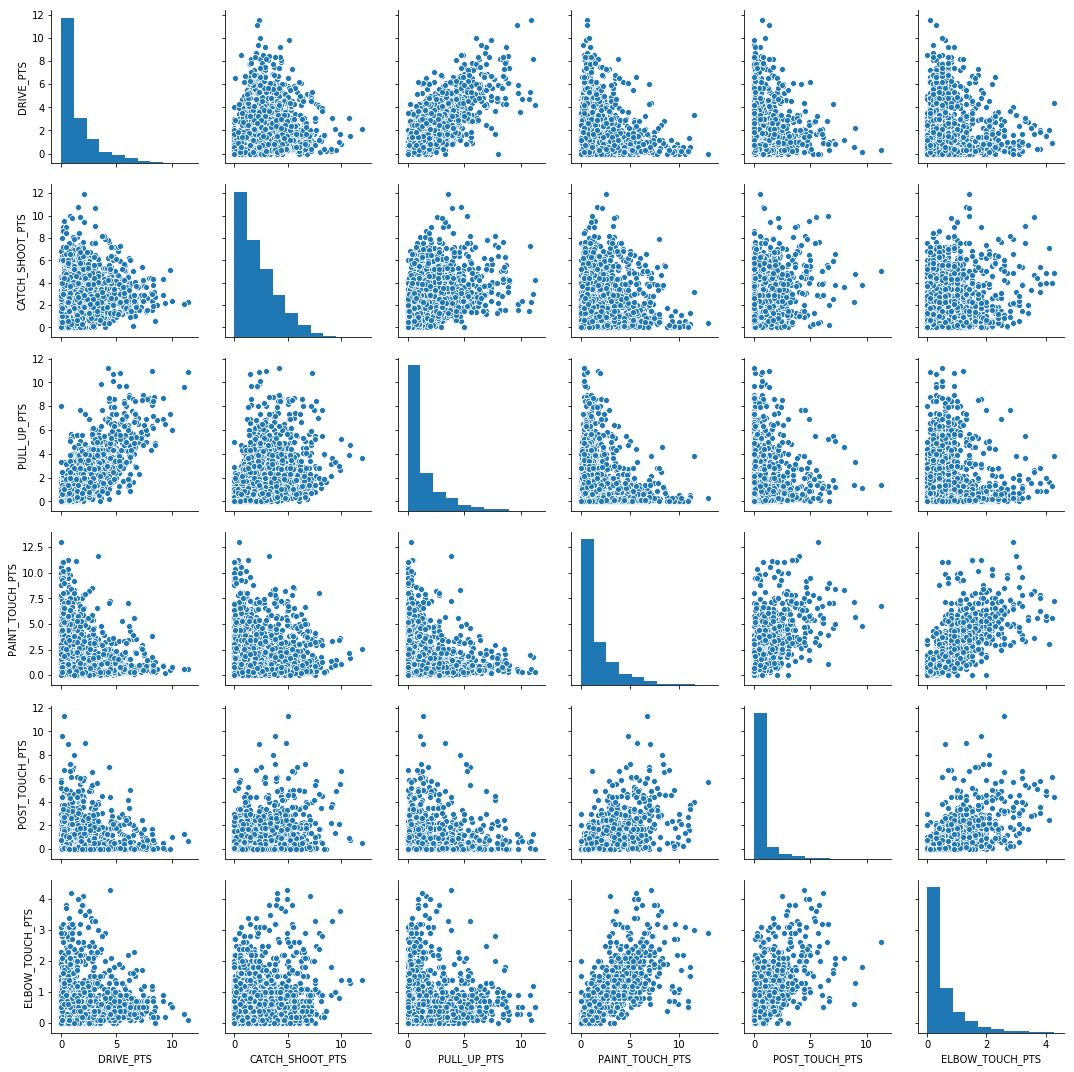

In [23]:
sns.pairplot(shooting_efficiency[points_columns]);

#### Pull-Up Shooting
- As attempts increase, effective field goal percentage quickly finds an equilibirum.
- Many players can't shoot pull ups at all, but other players form a roughly normal distribution centered around something slightly below the league average shooting percentage.

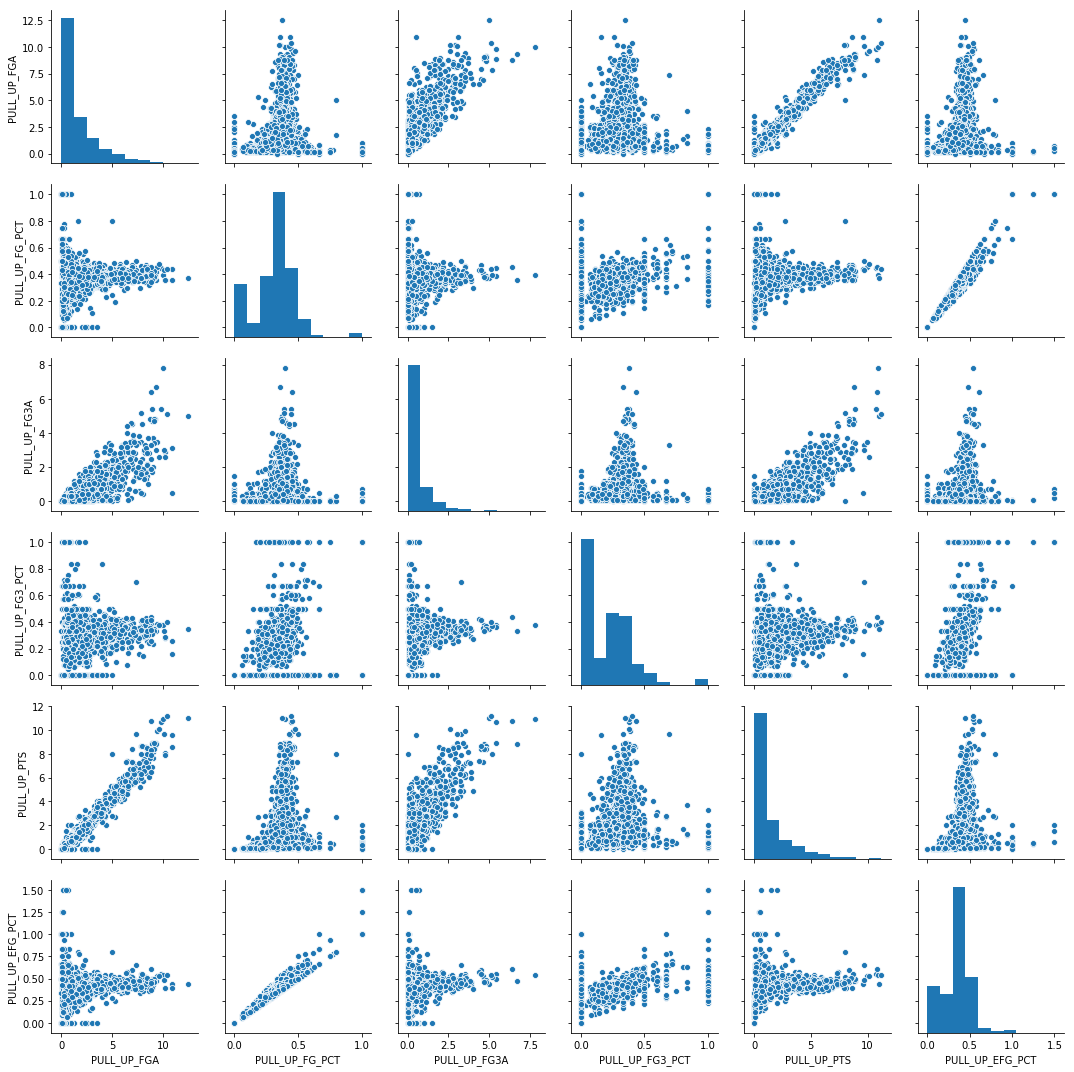

In [24]:
sns.pairplot(pullup_shooting[['PULL_UP_FGA', 'PULL_UP_FG_PCT', 'PULL_UP_FG3A', 'PULL_UP_FG3_PCT', 'PULL_UP_PTS', 
                              'PULL_UP_EFG_PCT']]);

#### Catch and Shoot
- Distributions are similar to pull-up shooting.
- There are slightly higher slopes connecting attempts and effectiveness (points and percentages).

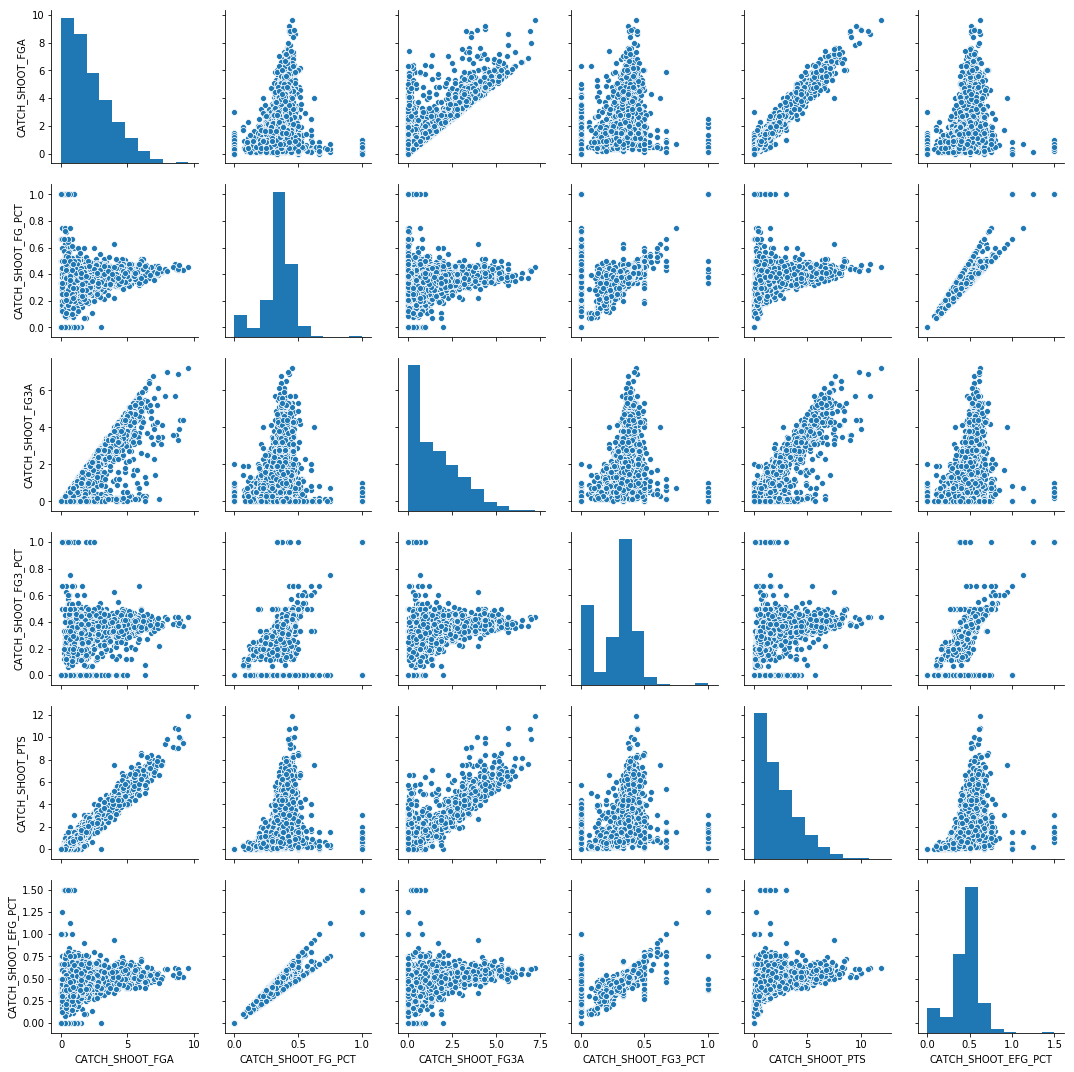

In [26]:
sns.pairplot(catch_shoot[['CATCH_SHOOT_FGA', 'CATCH_SHOOT_FG_PCT', 'CATCH_SHOOT_FG3A', 'CATCH_SHOOT_FG3_PCT',
                         'CATCH_SHOOT_PTS', 'CATCH_SHOOT_EFG_PCT']]);

#### Drives
- As drives increases, points percentage, shooting percentage, and assist percentage seem to find an equilibrium. It may be related to the idea that better players drive more, but defenses cap their value.

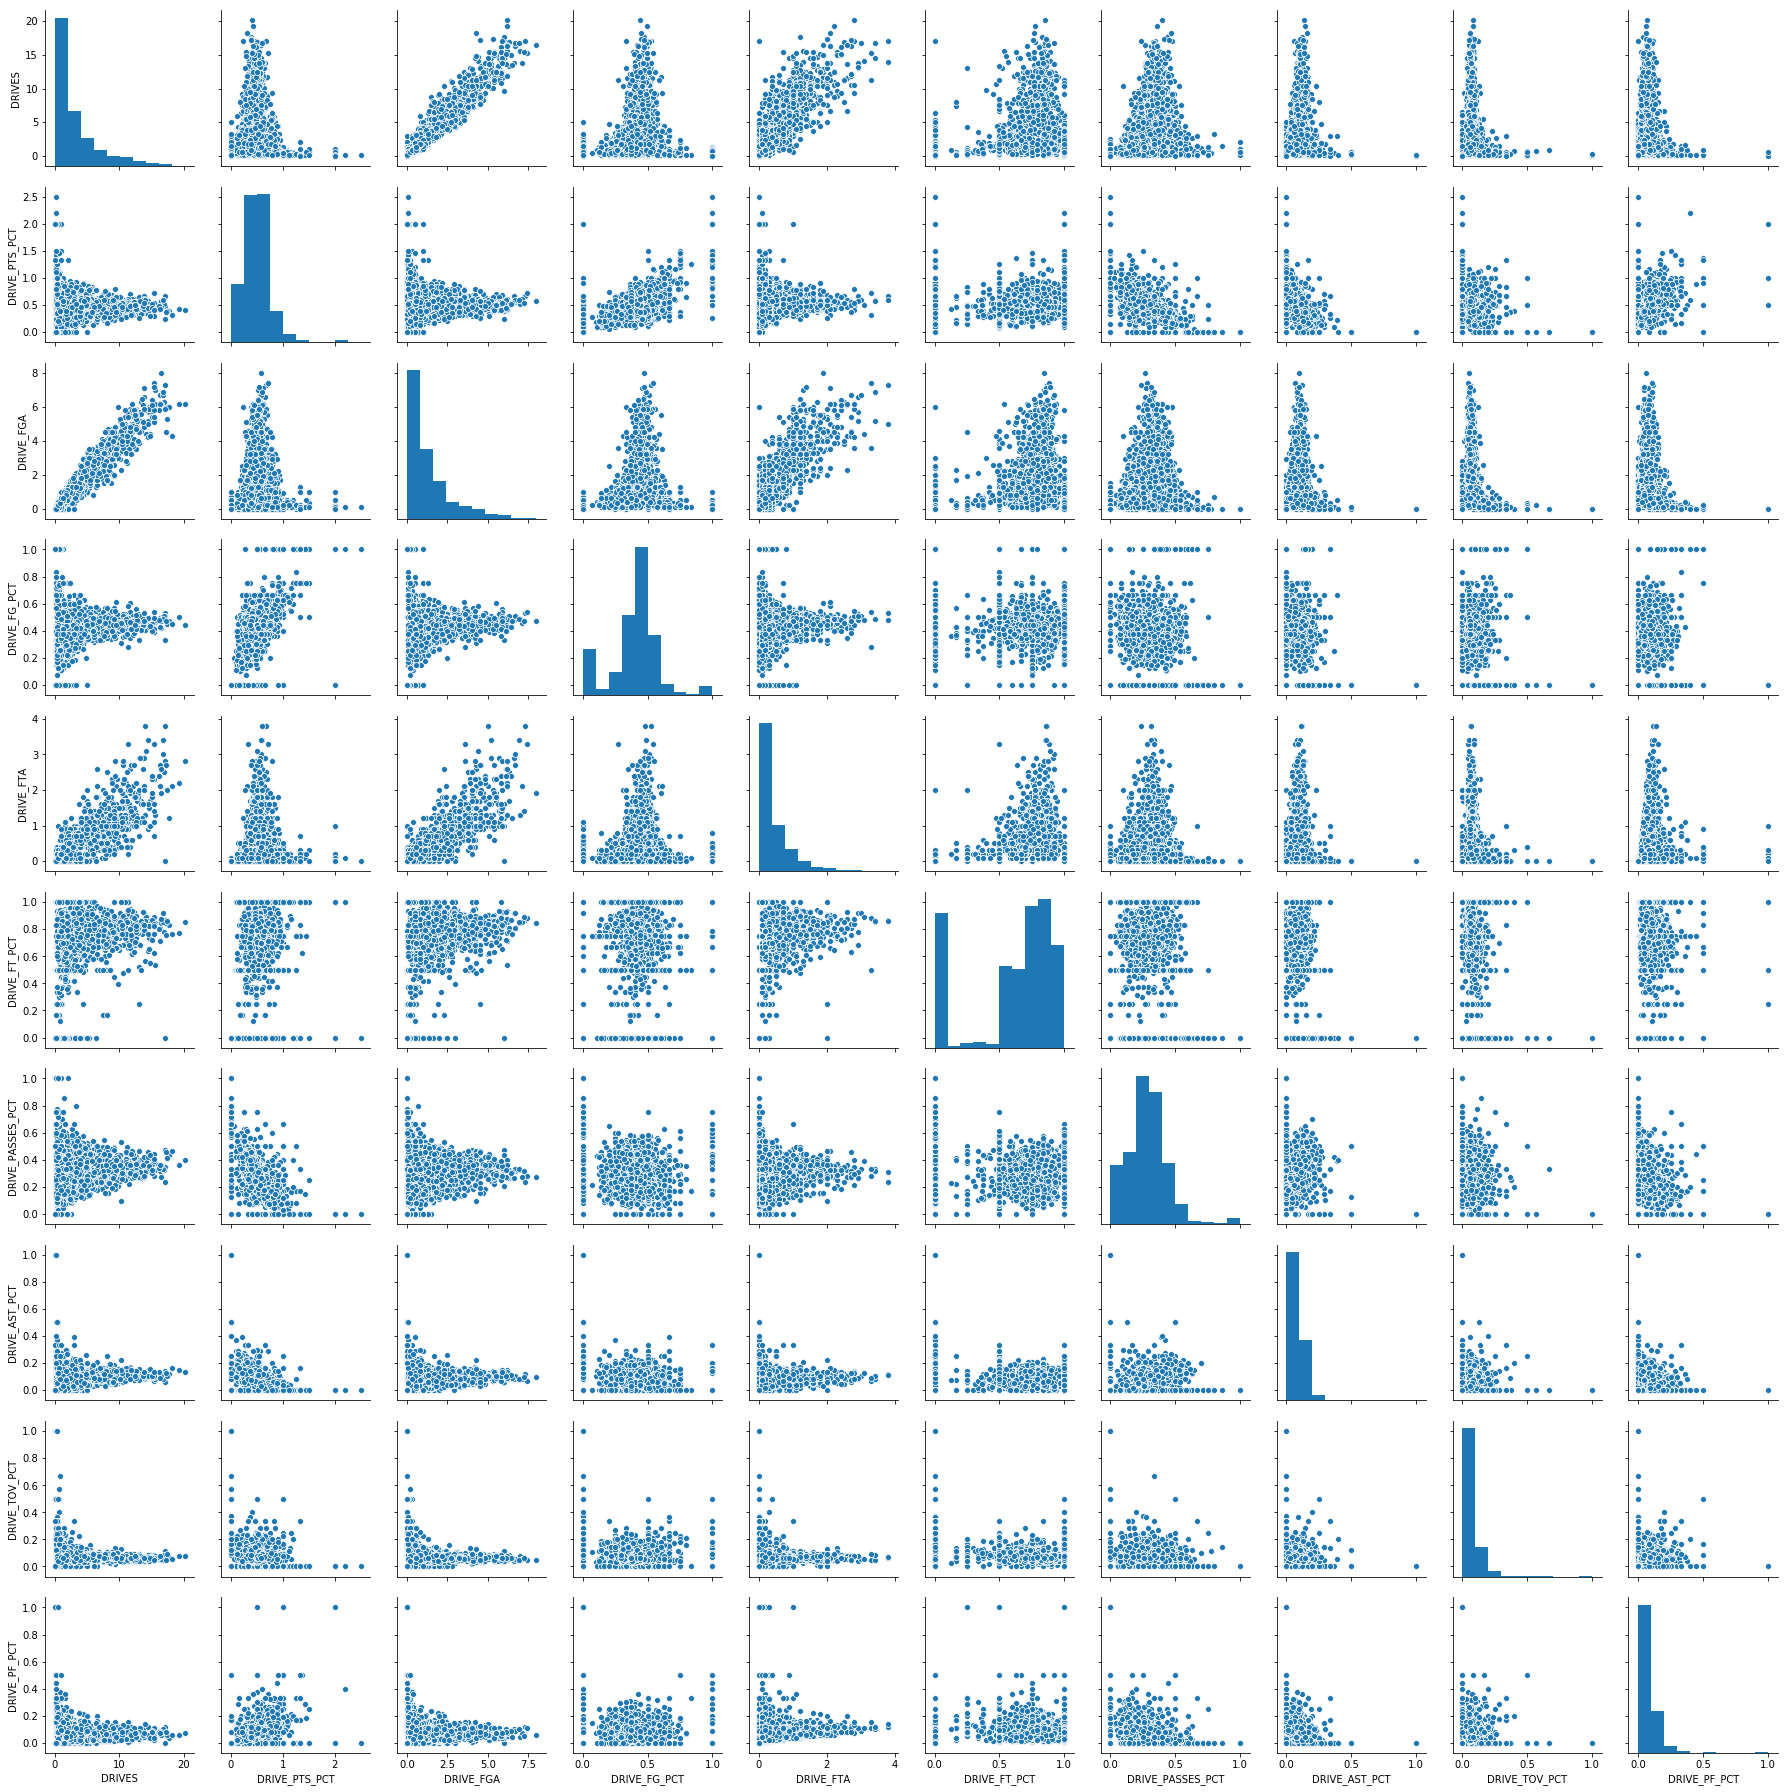

In [27]:
sns.pairplot(drives[['DRIVES', 'DRIVE_PTS_PCT', 'DRIVE_FGA', 'DRIVE_FG_PCT', 'DRIVE_FTA', 'DRIVE_FT_PCT',
                     'DRIVE_PASSES_PCT', 'DRIVE_AST_PCT', 'DRIVE_TOV_PCT', 'DRIVE_PF_PCT']]);

#### Post-Ups
- We see a similar equilibrium with post-up effectiveness as post-ups increase.
- Field goal percentage is also normalish and centered around something close to league average.

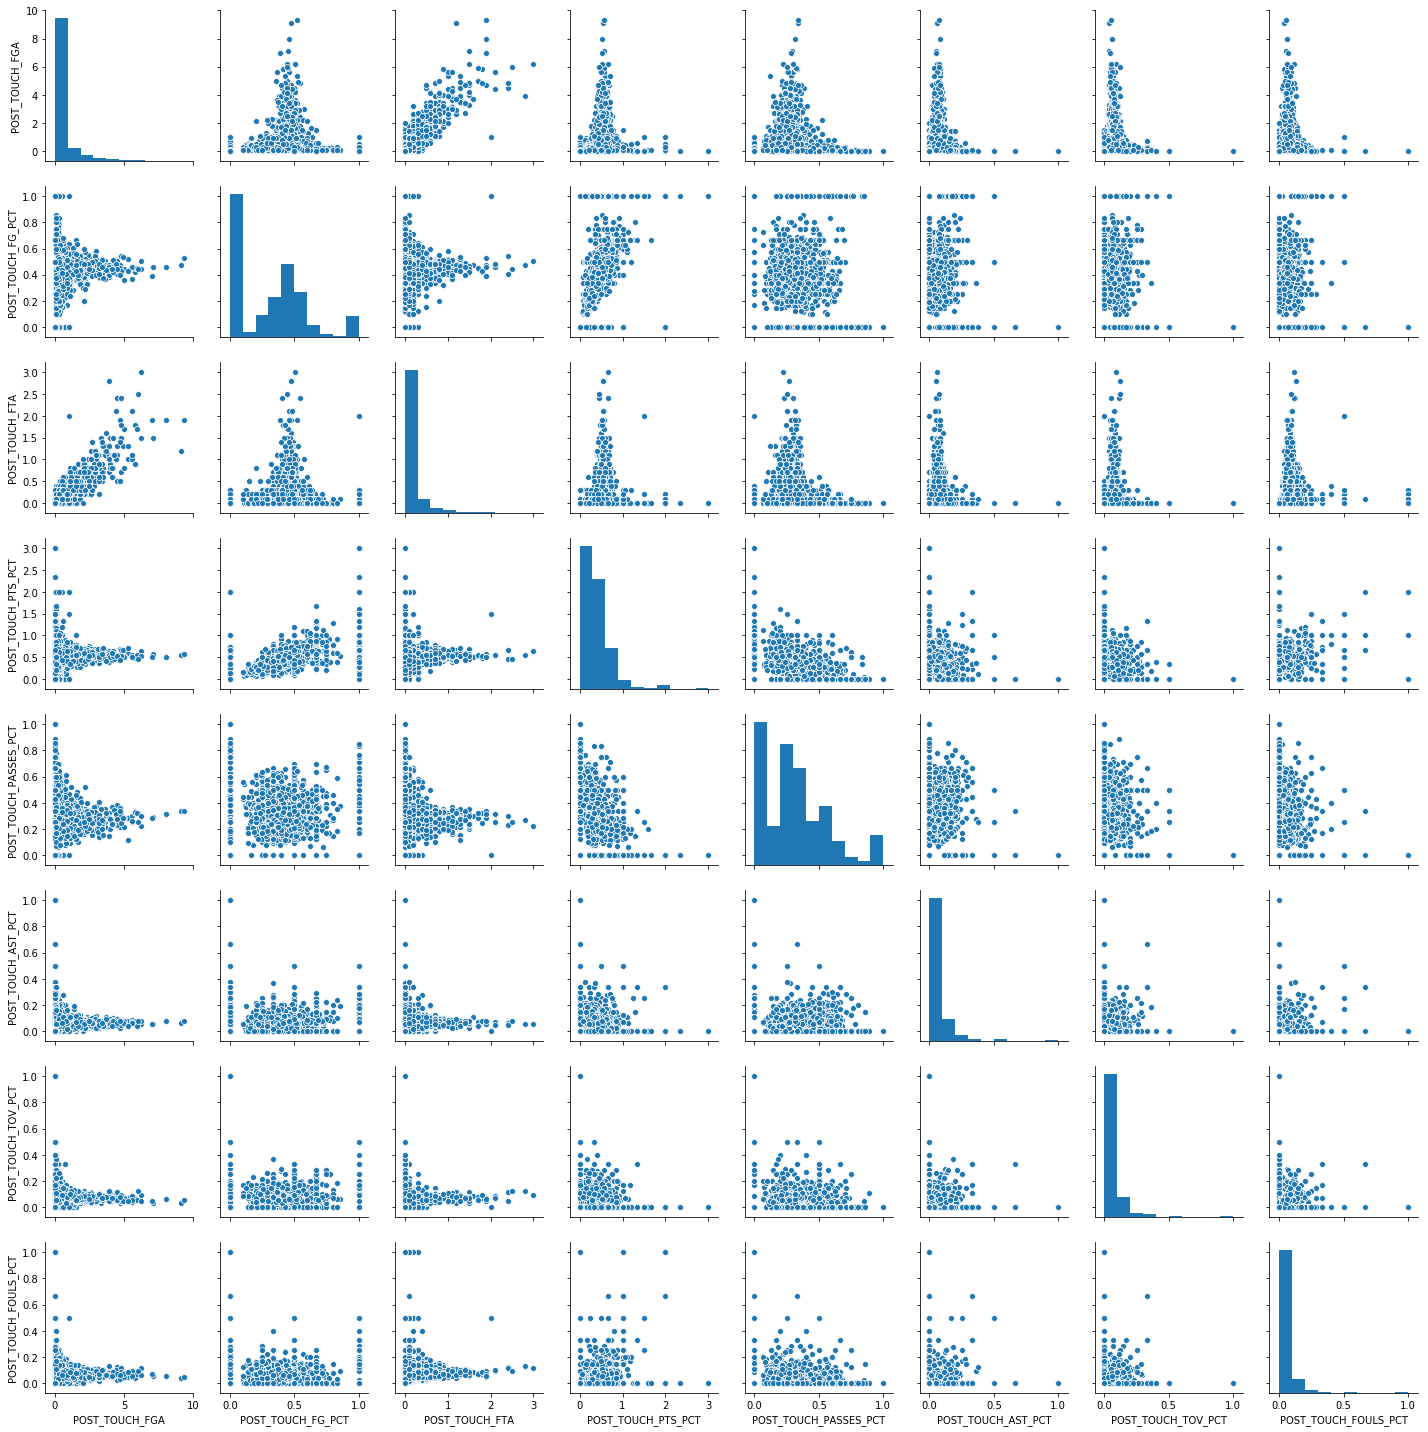

In [28]:
sns.pairplot(post_ups[['POST_TOUCH_FGA', 'POST_TOUCH_FG_PCT', 'POST_TOUCH_FTA', 'POST_TOUCH_PTS_PCT',
                       'POST_TOUCH_PASSES_PCT', 'POST_TOUCH_AST_PCT', 'POST_TOUCH_TOV_PCT', 'POST_TOUCH_FOULS_PCT']]);

#### Elbow Touches
- Follows similar patterns as other scoring categories.
- There seems to be less digits in some of the data and so some of it looks categorical.

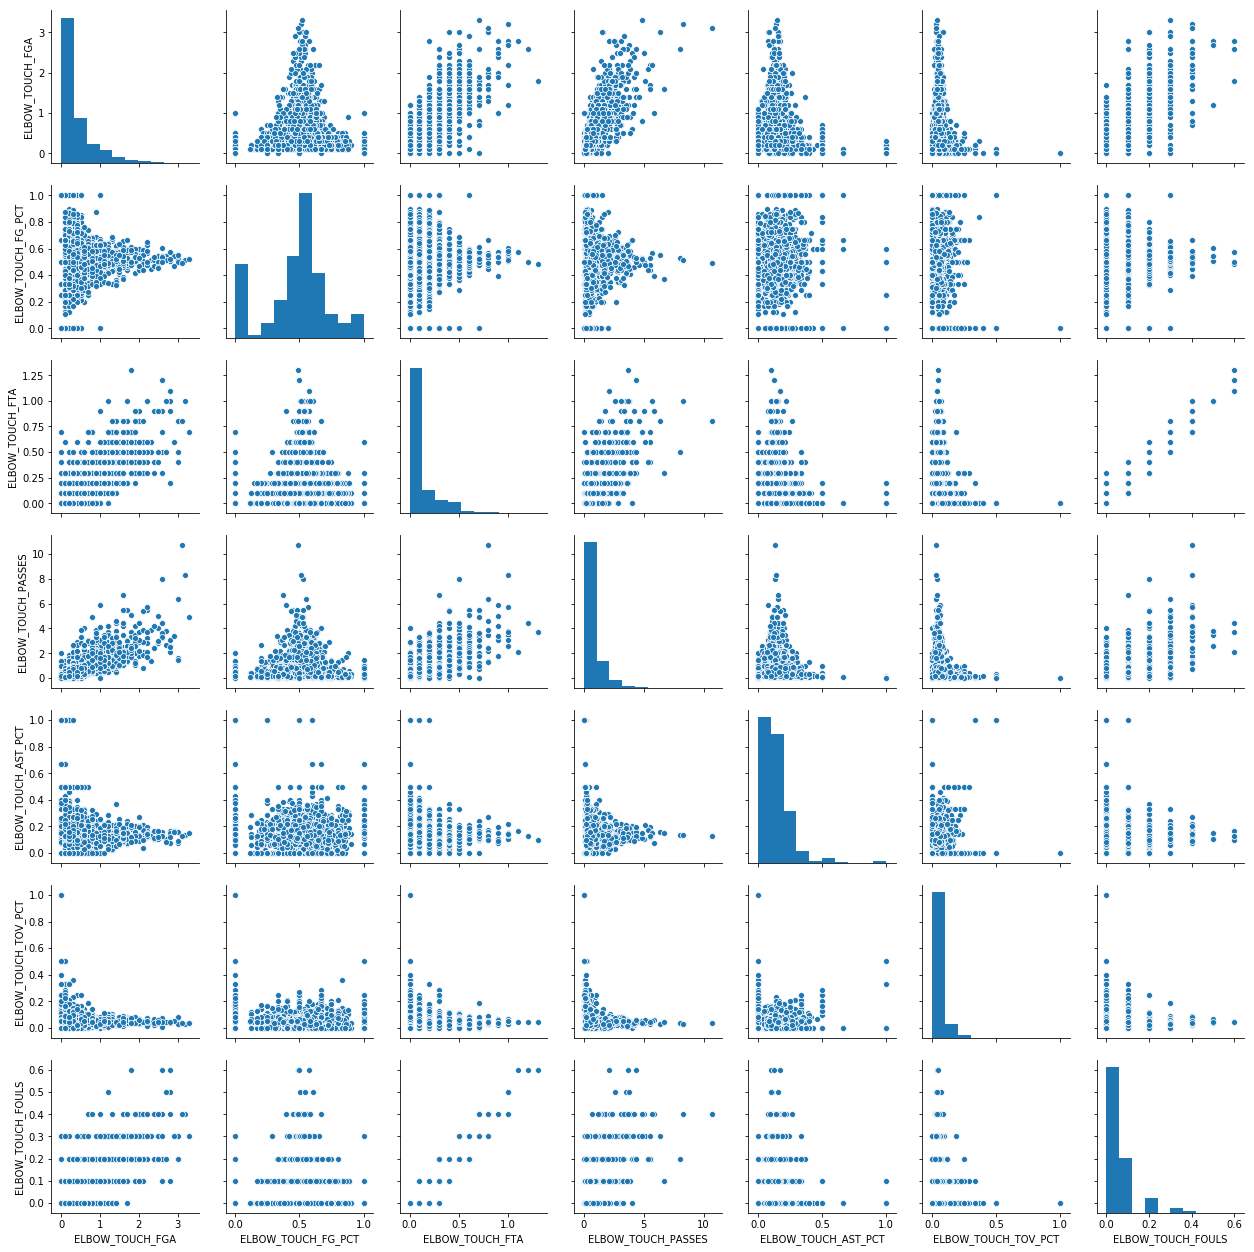

In [29]:
sns.pairplot(elbow_touches[['ELBOW_TOUCH_FGA', 'ELBOW_TOUCH_FG_PCT', 'ELBOW_TOUCH_FTA', 'ELBOW_TOUCH_PASSES',
                            'ELBOW_TOUCH_AST_PCT', 'ELBOW_TOUCH_TOV_PCT', 'ELBOW_TOUCH_FOULS']]);

#### Paint Touches
- The field goal percentage at "equilibrium" is much higher than other scoring categories. It is also more skewed.
- The assist percentage is relatively low.

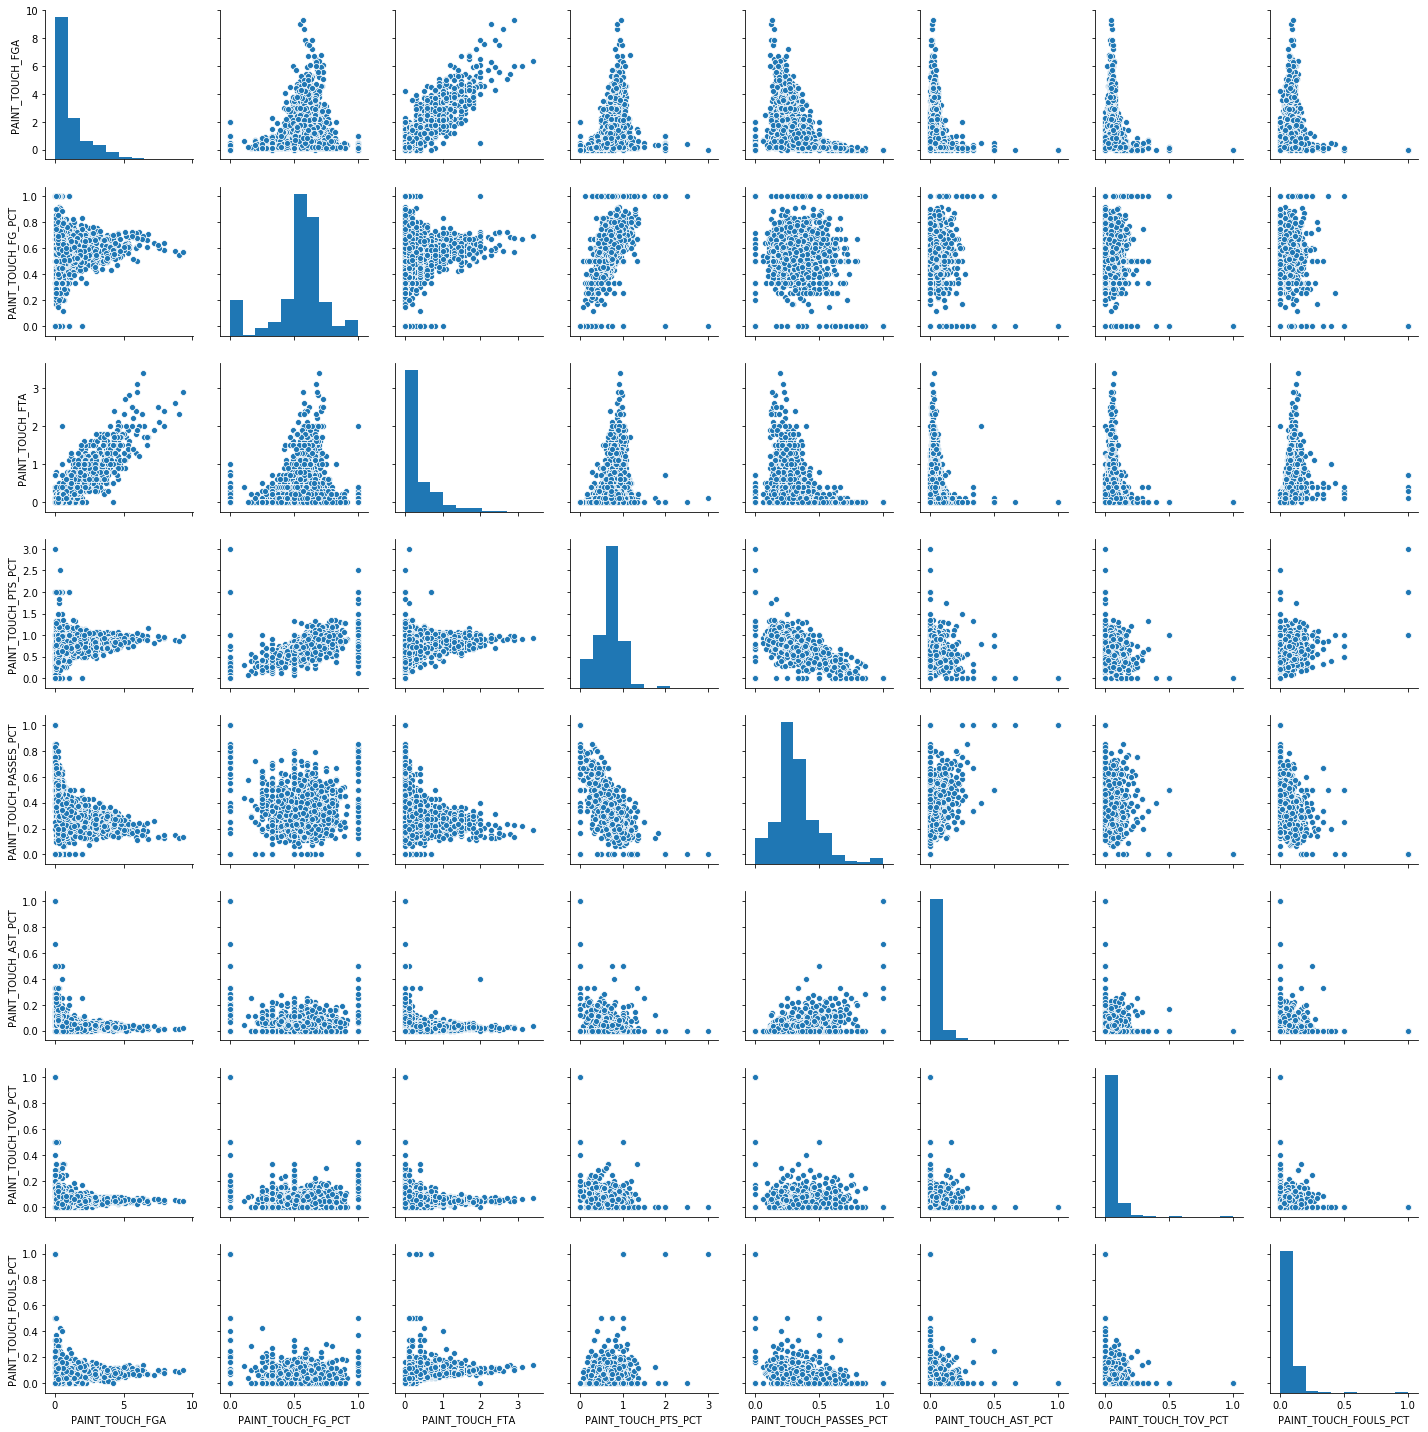

In [30]:
sns.pairplot(paint_touches[['PAINT_TOUCH_FGA', 'PAINT_TOUCH_FG_PCT', 'PAINT_TOUCH_FTA', 'PAINT_TOUCH_PTS_PCT',
                            'PAINT_TOUCH_PASSES_PCT', 'PAINT_TOUCH_AST_PCT', 'PAINT_TOUCH_TOV_PCT',
                            'PAINT_TOUCH_FOULS_PCT']]);

### Defense and Hustle
#### Defensive Impact
- A lot of these stats are not particularly helpful as they represent totals.
- Field goal precentage at the rim converges as attempts at the rim increase and it converges to a lower than average score.

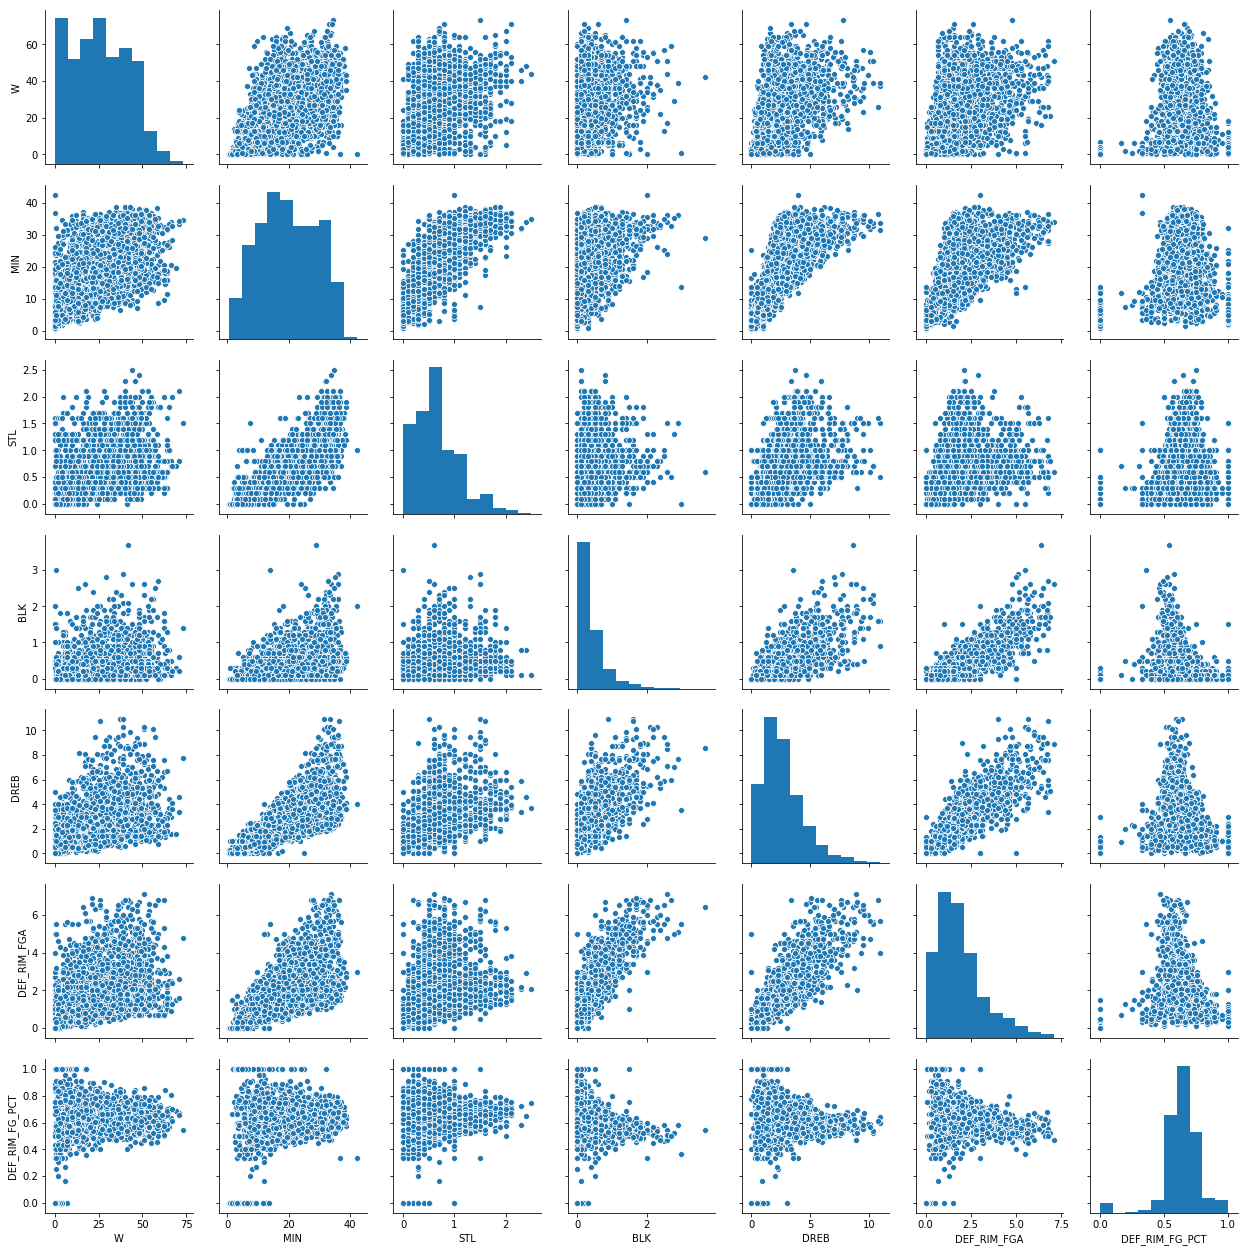

In [31]:
sns.pairplot(defensive_impact[['W', 'MIN', 'STL', 'BLK', 'DREB', 'DEF_RIM_FGA', 'DEF_RIM_FG_PCT']]);

#### Hustle
- These represent totals and therefore tend to go up together
- For some relationships, there is a group of players that does not follow the general trend and just never does that action (see contested shots and box outs). Perhaps that group of players reflects a certain position (maybe point guards rarely need to box out).

/anaconda3/envs/dsi/lib/python3.6/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/envs/dsi/lib/python3.6/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


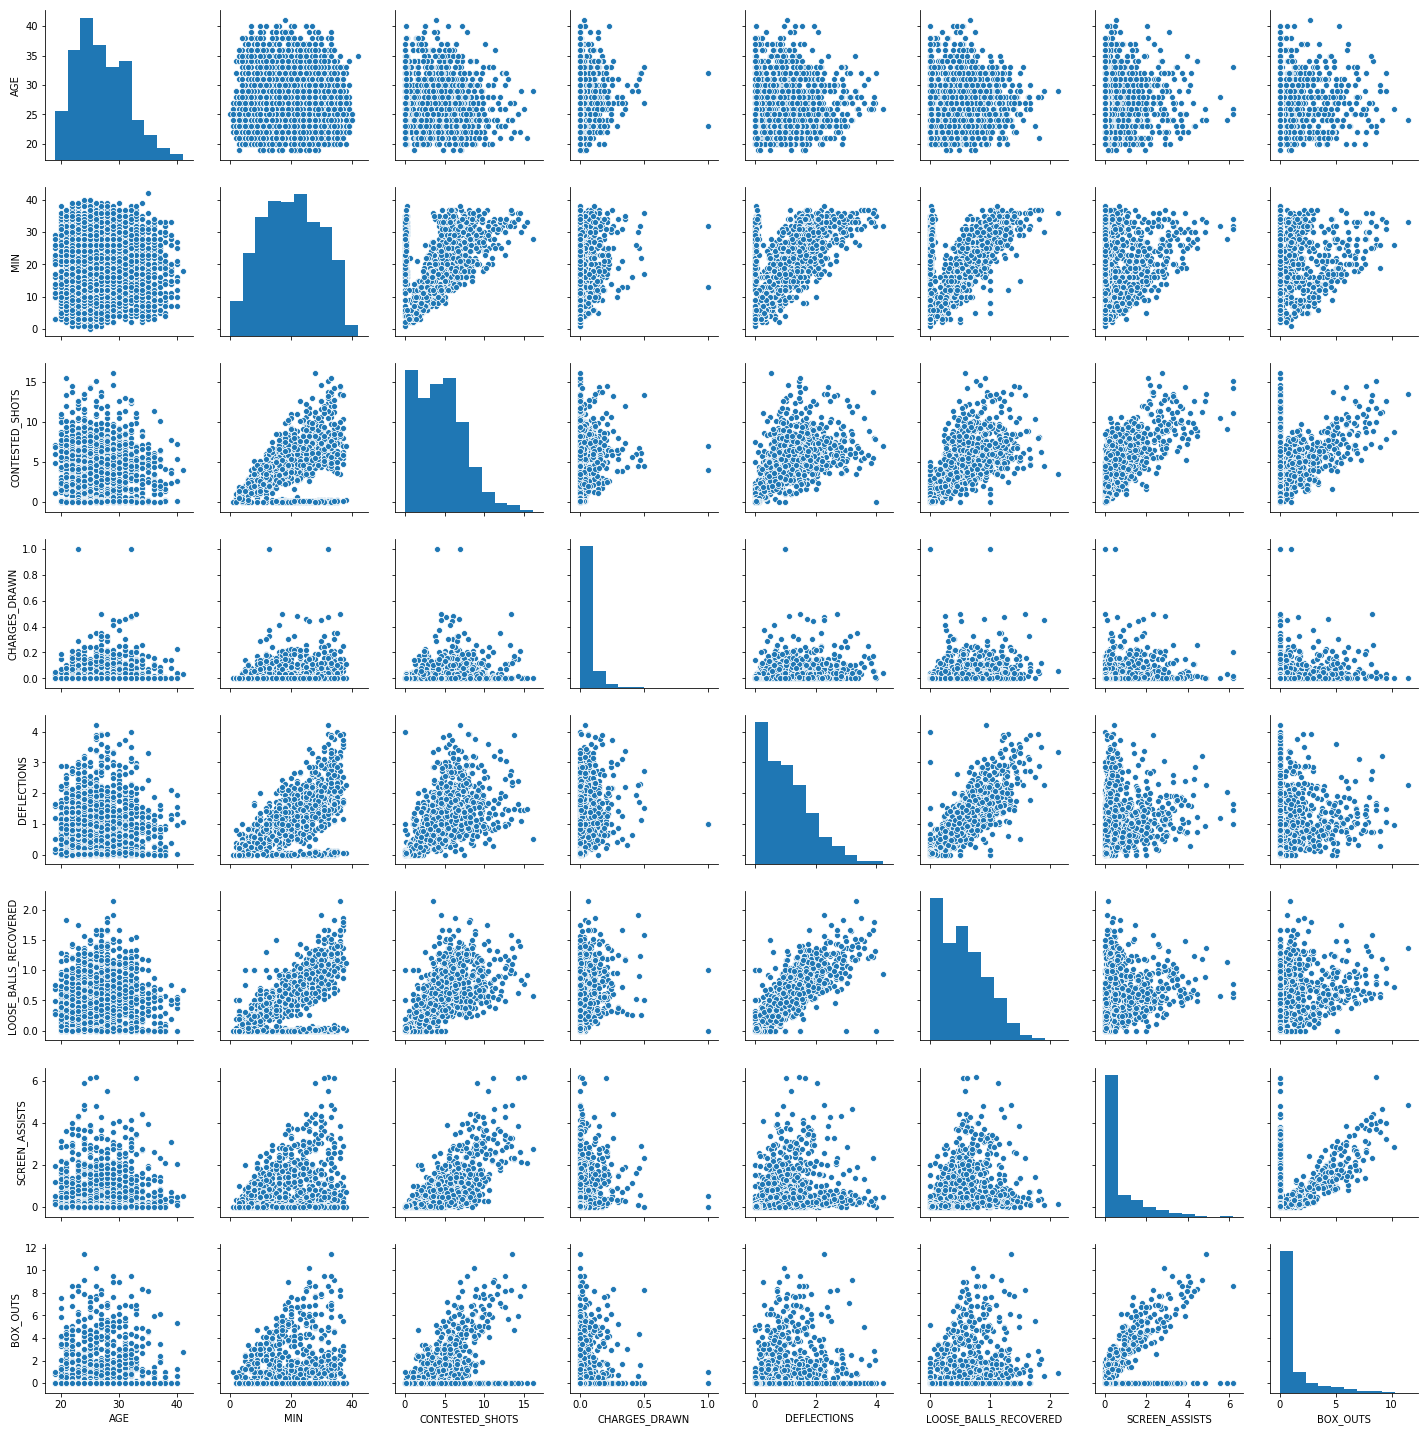

In [32]:
sns.pairplot(hustle.loc[:, ['AGE', 'MIN', 'CONTESTED_SHOTS', 'CHARGES_DRAWN', 'DEFLECTIONS', 'LOOSE_BALLS_RECOVERED',
                            'SCREEN_ASSISTS', 'BOX_OUTS']]);

#### Speed and Distance
- Miles on offense and defense are strongly correlated, but is that just a product of more minutes?
- There are some weird outliers with speed.
- It is hard to see relationships between speed categories due to the outliers' effect on the scale of the graph.
- From the graphs of the filtered data, speed on offense and defense do not seem related.
- Also, speed and distance do not seem related.

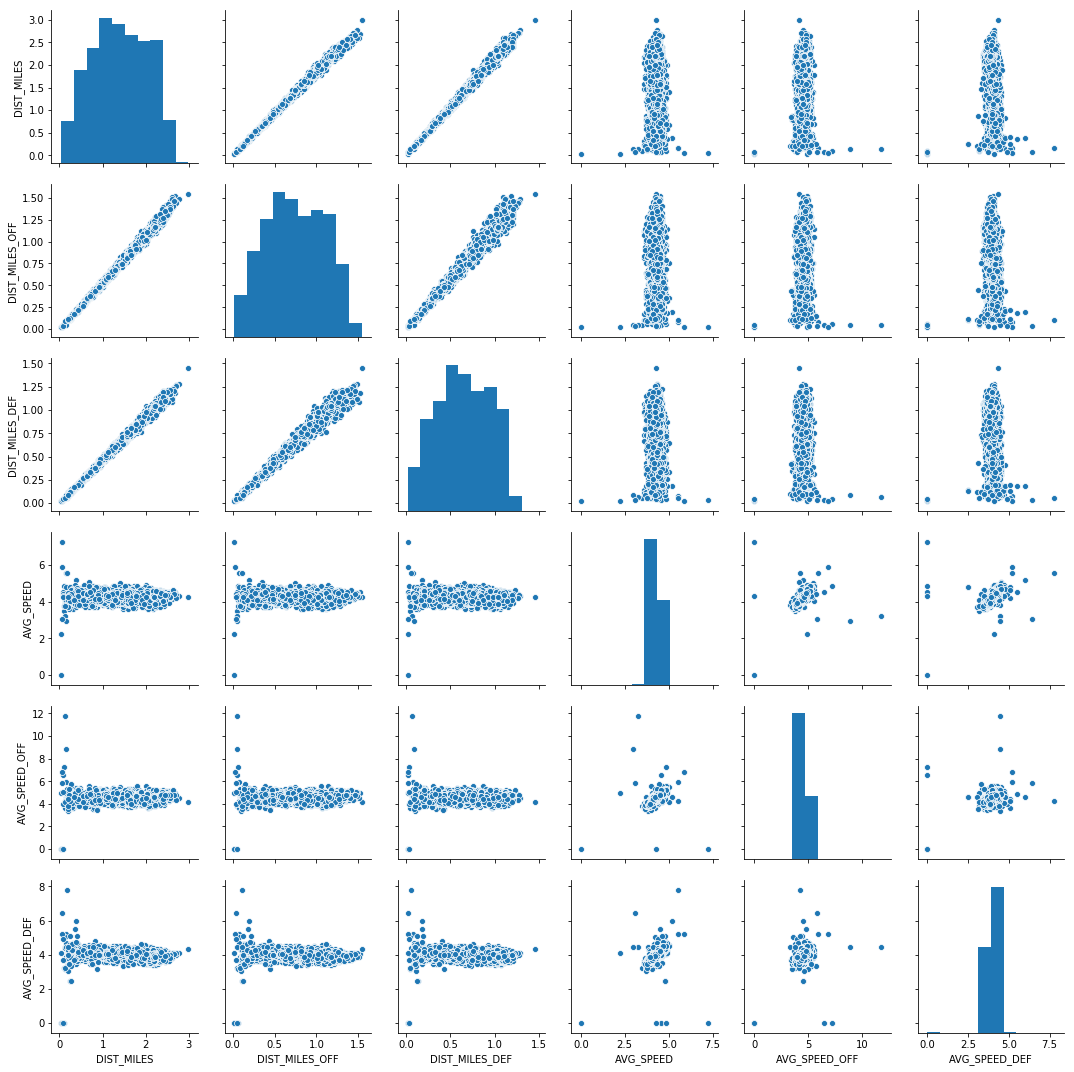

In [33]:
sns.pairplot(speed_distance[['DIST_MILES', 'DIST_MILES_OFF', 'DIST_MILES_DEF', 'AVG_SPEED', 'AVG_SPEED_OFF',
                             'AVG_SPEED_DEF']]);

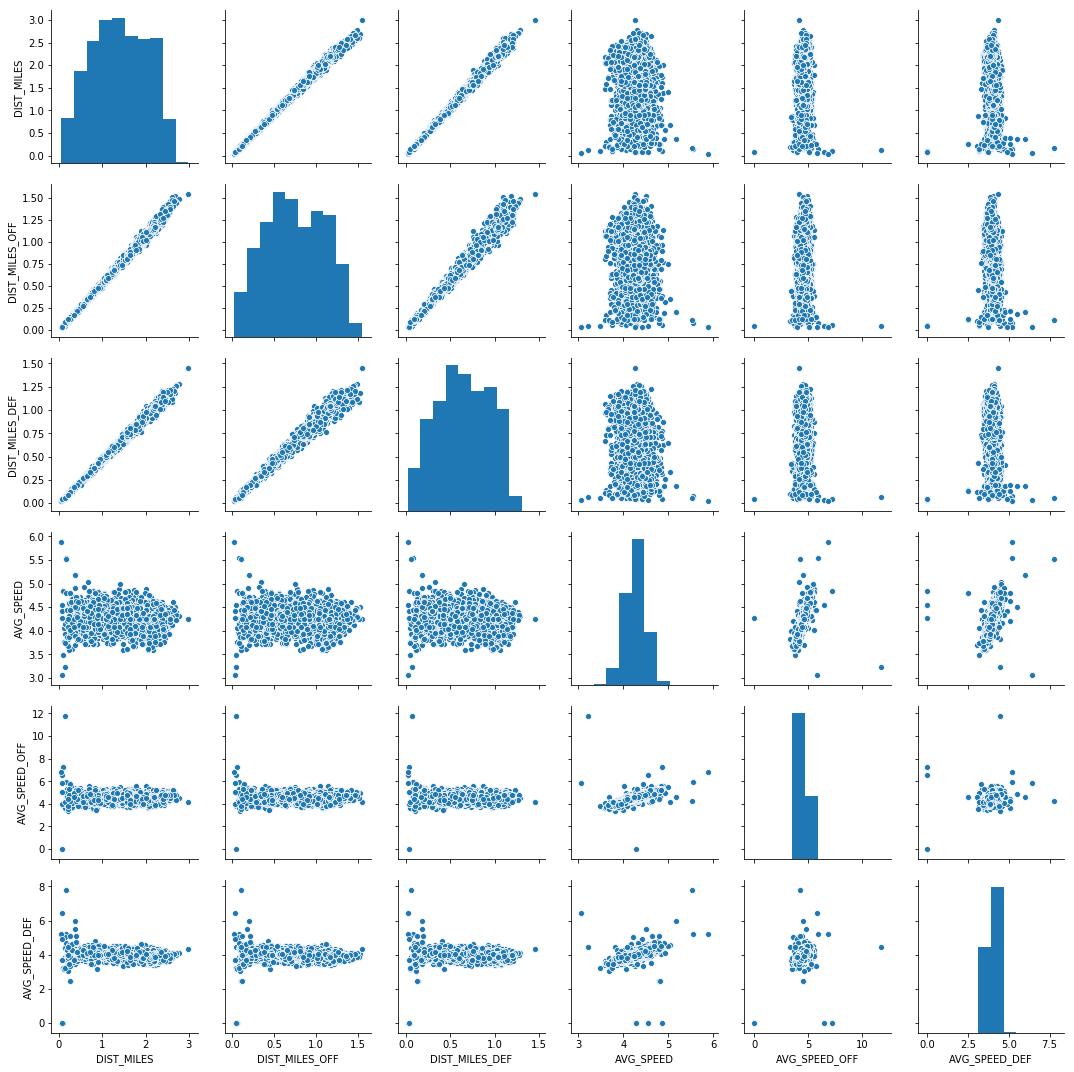

In [34]:
sns.pairplot(speed_distance[(speed_distance['AVG_SPEED'] < 7) & (speed_distance['AVG_SPEED'] > 3)][
    ['DIST_MILES', 'DIST_MILES_OFF', 'DIST_MILES_DEF', 'AVG_SPEED', 'AVG_SPEED_OFF', 'AVG_SPEED_DEF']]);

#### Rebounding
- There does not seem to be a strong connection with offensive and defensive rebounding percentages.
- Defensive rebounding has a very tight distribution.
- The smaller the distance of the rebound, the likelier it won't be contested.

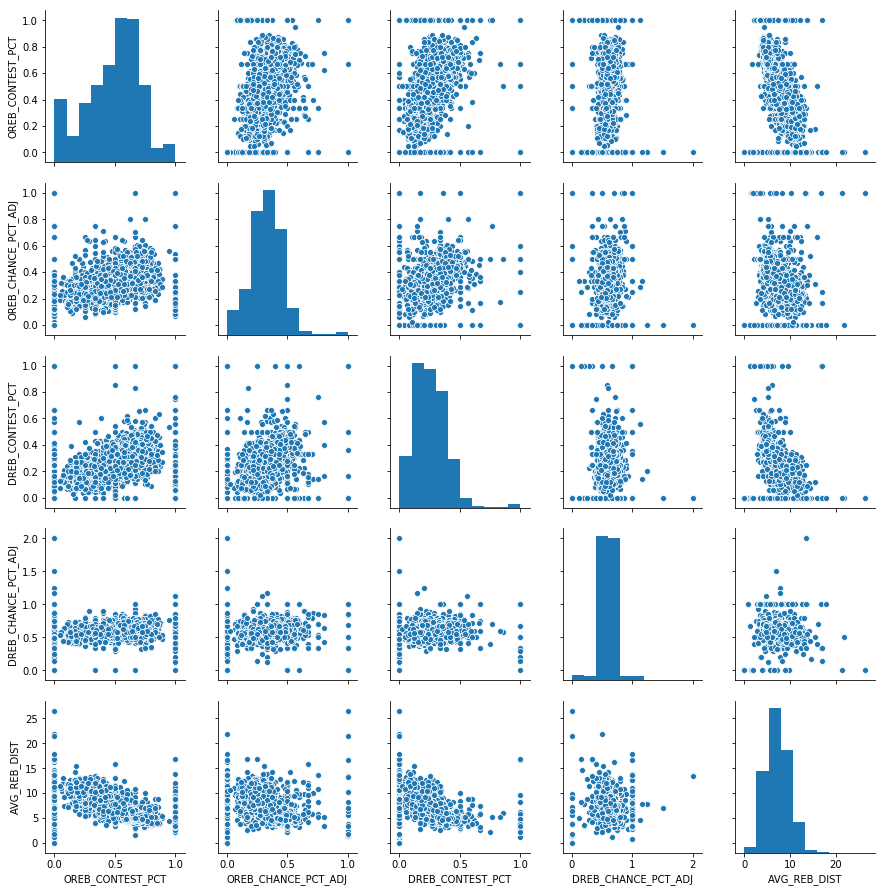

In [35]:
sns.pairplot(rebounding[['OREB_CONTEST_PCT', 'OREB_CHANCE_PCT_ADJ','DREB_CONTEST_PCT', 'DREB_CHANCE_PCT_ADJ',
                         'AVG_REB_DIST']]);

### Advanced Stats
#### Advanced
- Offensive and defensive rating are unchanged almost regardless of comparison.
- As usage goes up, true shooting generally goes up, but assist to turnover ratio generally decereases.

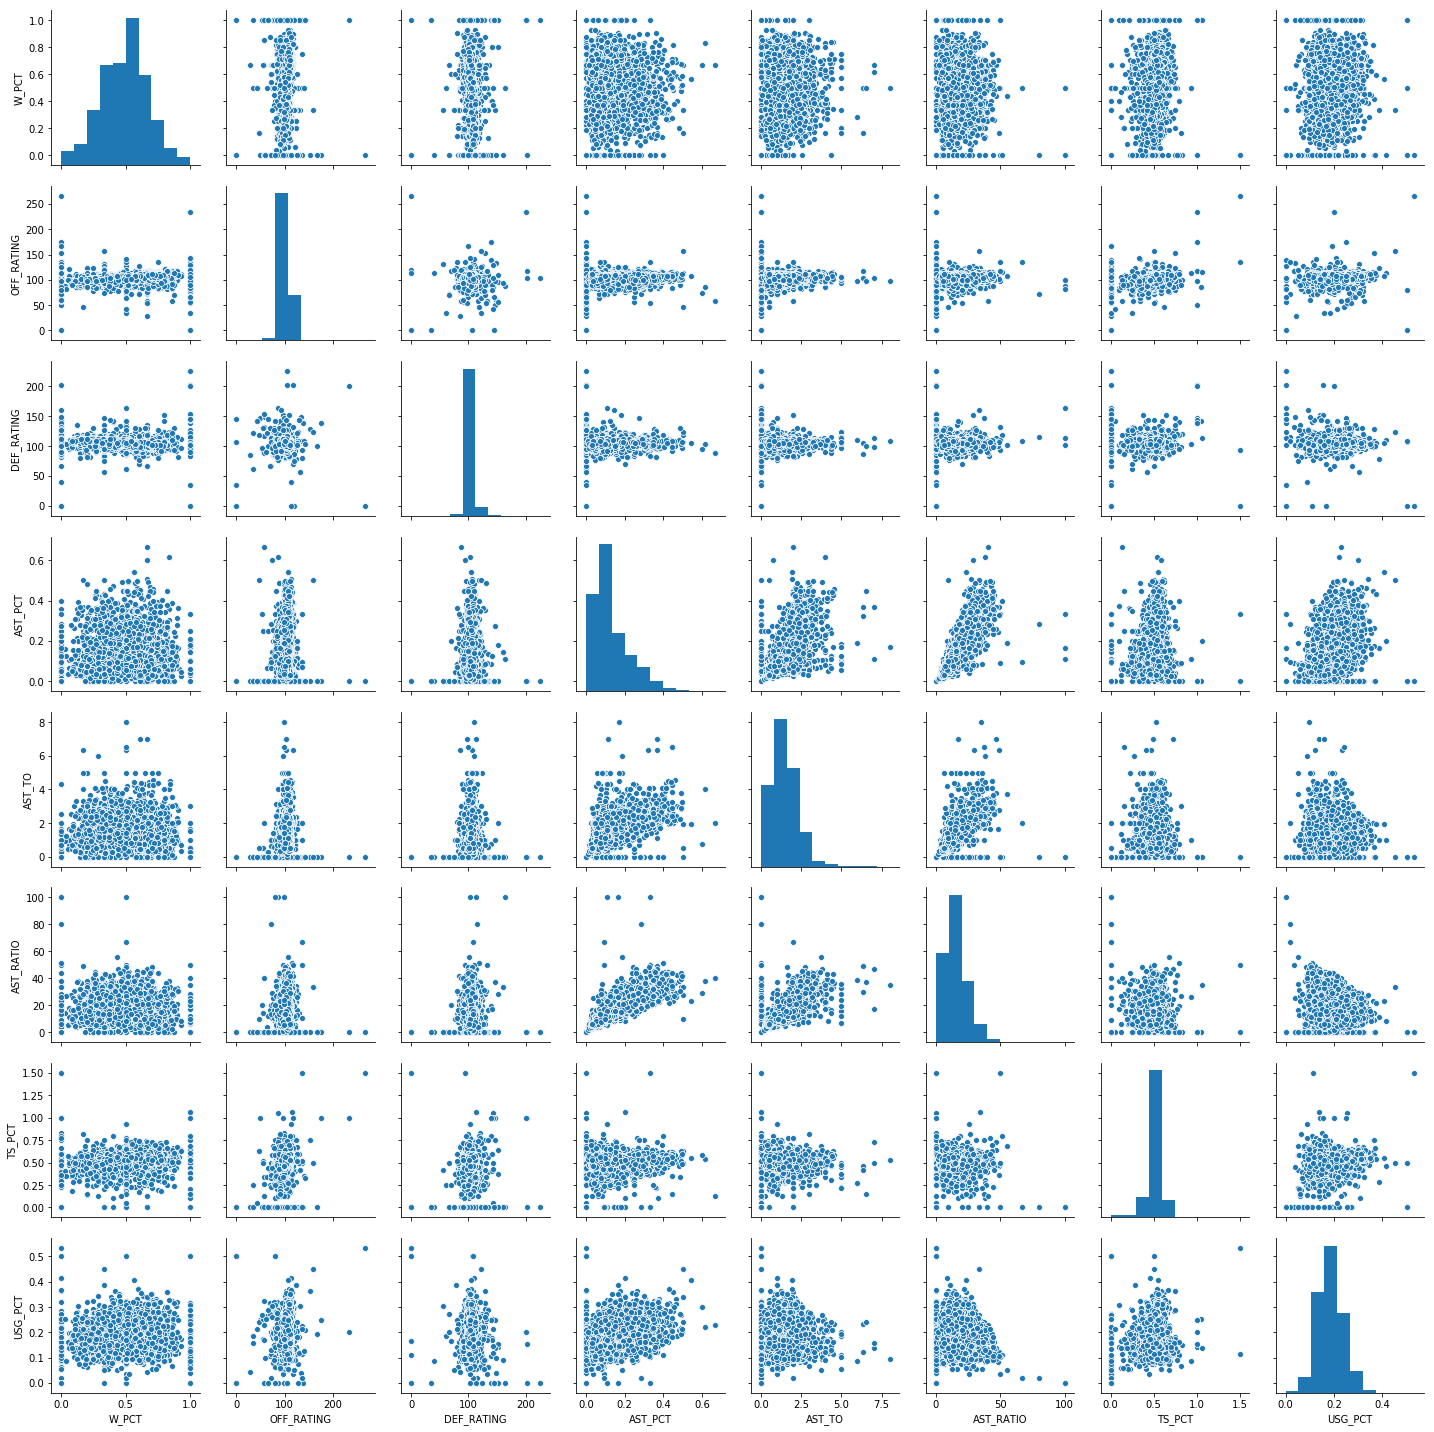

In [36]:
sns.pairplot(advanced[['W_PCT', 'OFF_RATING', 'DEF_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'TS_PCT', 'USG_PCT']]);

### Passing
#### Passing
- There is a lot of overlap in these stats, and as one increases they all do.
- Even assists to turnovers increases as assists increase, which is not consistent with the results of many of the scoring categories.

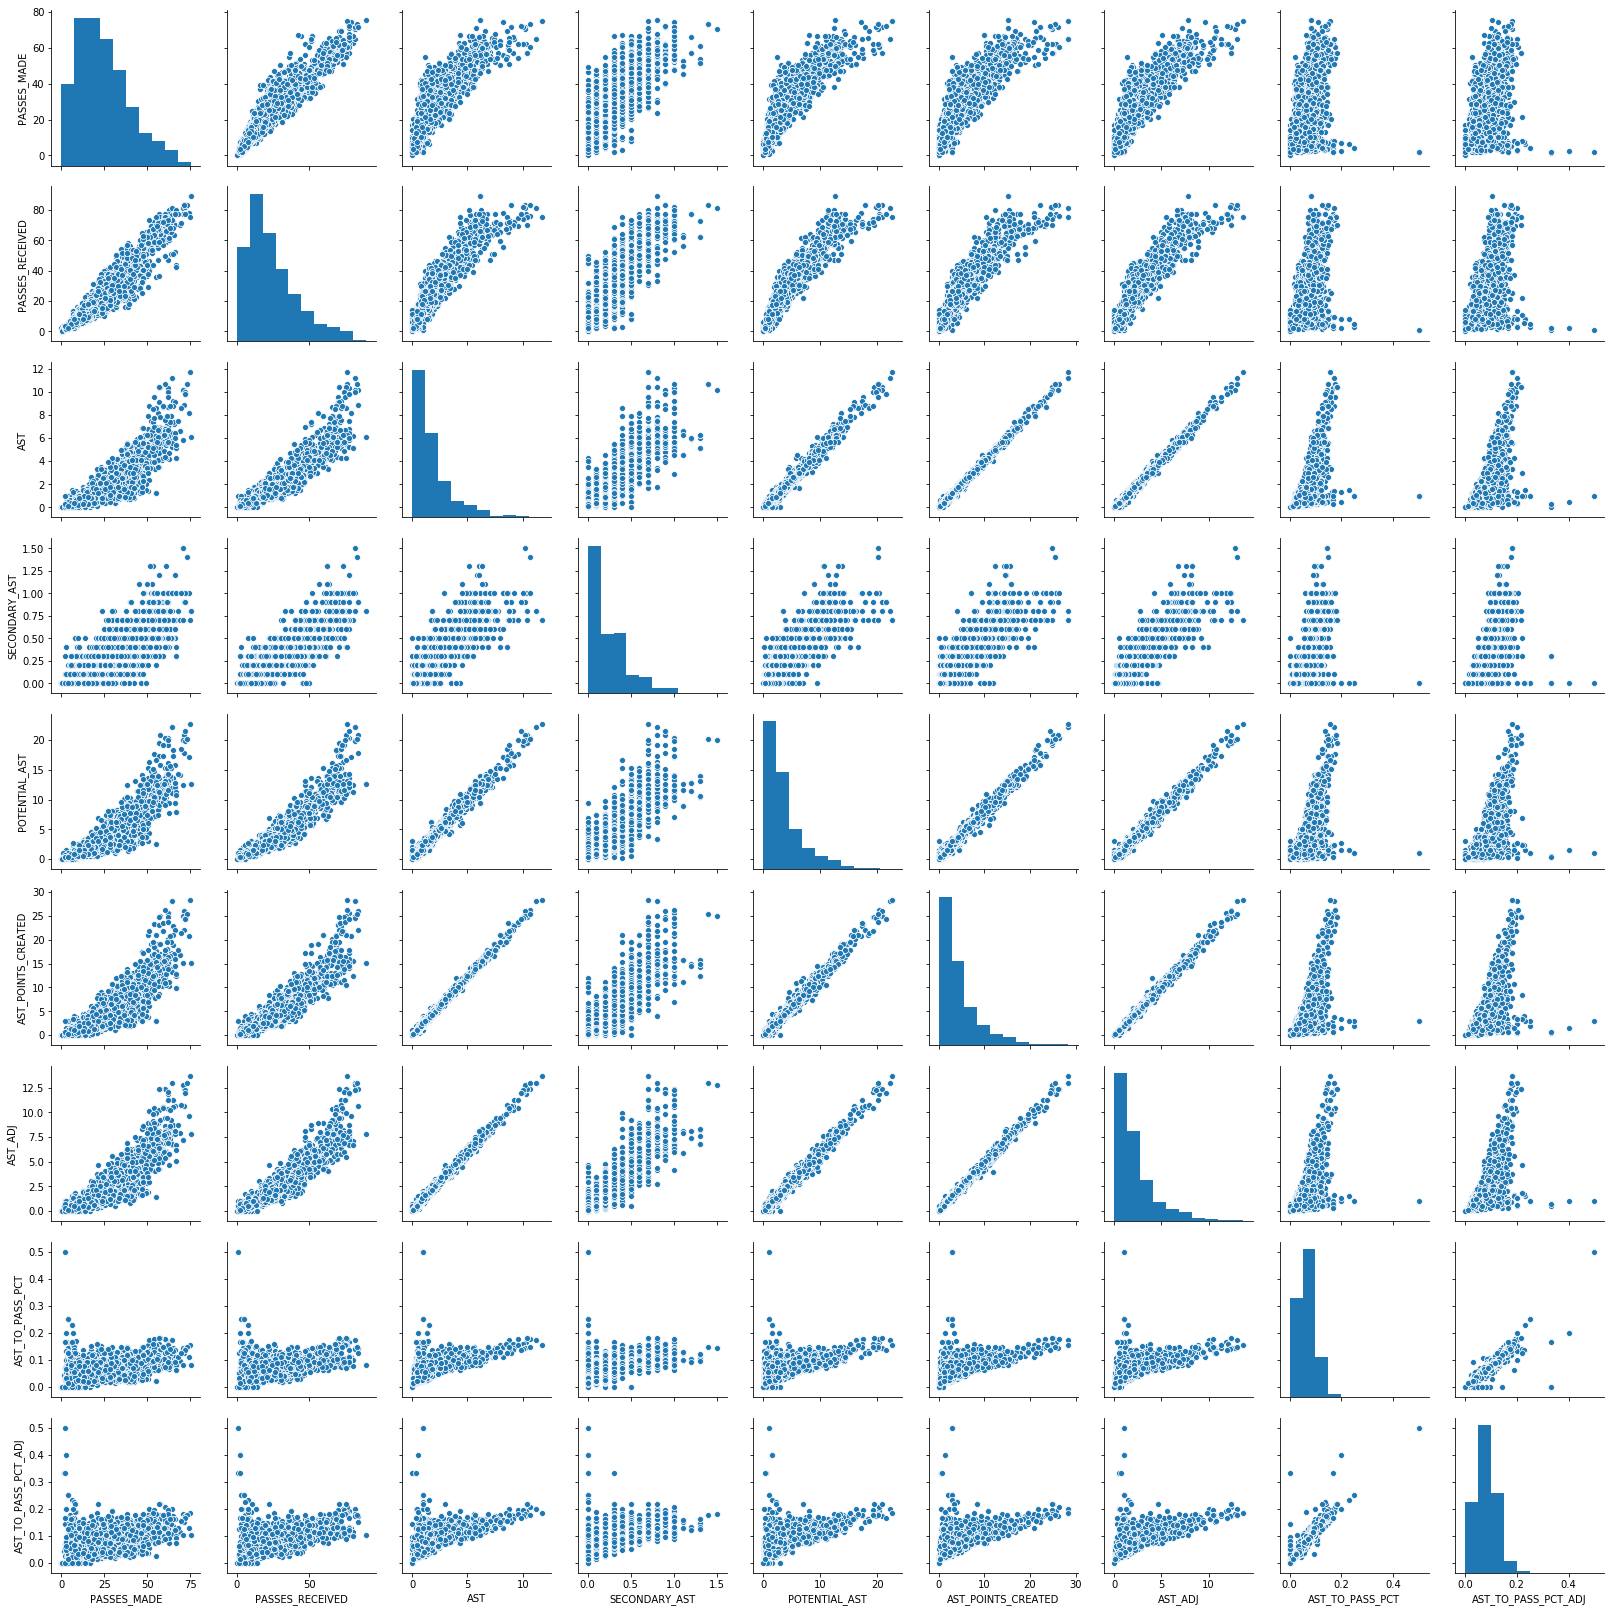

In [37]:
sns.pairplot(passing[['PASSES_MADE', 'PASSES_RECEIVED', 'AST', 'SECONDARY_AST', 'POTENTIAL_AST', 'AST_POINTS_CREATED',
                      'AST_ADJ', 'AST_TO_PASS_PCT', 'AST_TO_PASS_PCT_ADJ']]);

### Shooting Extension
#### Very Open
- The shooting is unsurprisingly unrelated.

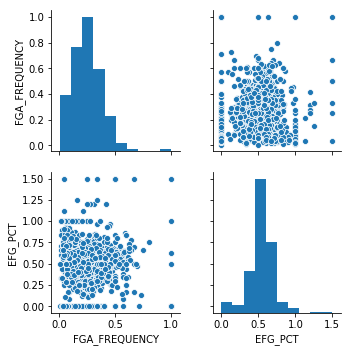

In [59]:
sns.pairplot(shooting_very_open[['FGA_FREQUENCY', 'EFG_PCT']]);

#### Open
- The shooting effectiveness and rate still seems unrelated.

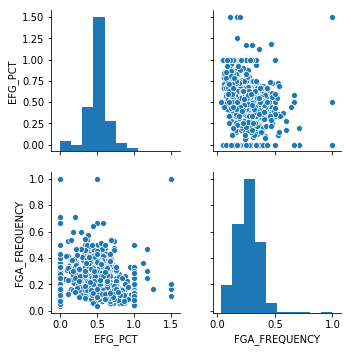

In [60]:
sns.pairplot(shooting_open[['EFG_PCT', 'FGA_FREQUENCY']]);

#### Shooting Tight
- We can see more of a relationship between effectiveness and rate.

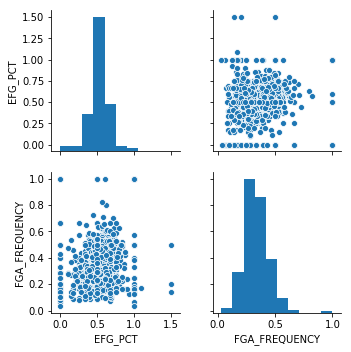

In [61]:
sns.pairplot(shooting_tight[['EFG_PCT', 'FGA_FREQUENCY']]);

#### Shooting Very Tight
- This looks pretty similar to the tight shooting plots.

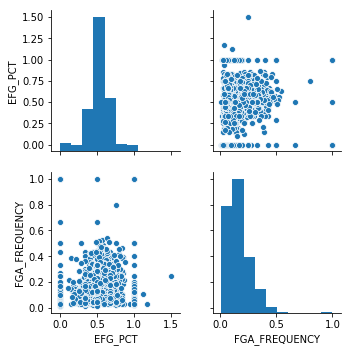

In [62]:
sns.pairplot(shooting_very_tight[['EFG_PCT', 'FGA_FREQUENCY']]);

#### Shooting Off 1 Dribble
- There is some of the equilibrium we have seen before for scoring effectiveness.

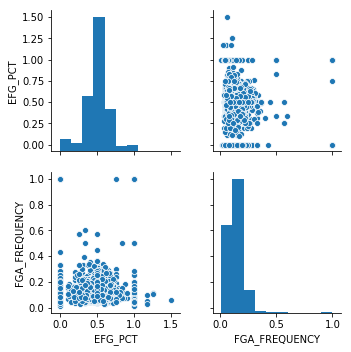

In [66]:
sns.pairplot(shooting_1_dribble[['EFG_PCT', 'FGA_FREQUENCY']]);

#### Shooting Off 2 Dribbles
- The scatter plot more quickly and tightly approaches the equilibrium.

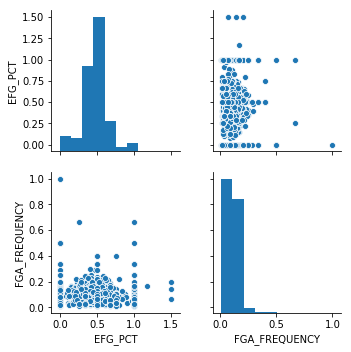

In [67]:
sns.pairplot(shooting_2_dribbles[['EFG_PCT', 'FGA_FREQUENCY']]);

#### Shooting Off 3 - 6 Dribbles
- The distribution is a bit looser and we see more variance at higher FGA than before (ignoring outliers).

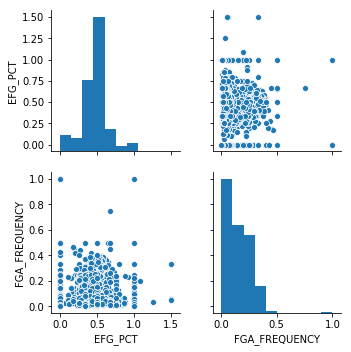

In [68]:
sns.pairplot(shooting_3_6_dribbles[['EFG_PCT', 'FGA_FREQUENCY']]);

#### Shooting Off 7+ Dribbles
- There is again more players at high FGA rates.
- The distribution is a bit tighter than 3-6 dribbles.

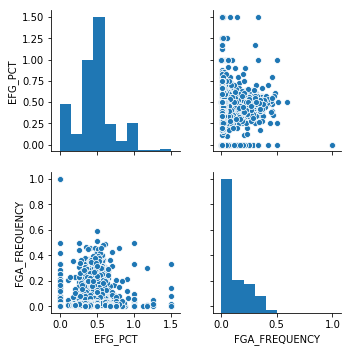

In [69]:
sns.pairplot(shooting_7_dribbles[['EFG_PCT', 'FGA_FREQUENCY']]);

In [ ]:
# Add shooting off the dribble stats to help with predicting pull up shooting (have)
# potentially just some are you dribbling stats too (have)
# For post scoring you need close to the basket shooting, offensive rebounding (have)
# For drives and the post you want stuff to predict shooting, getting fouled, TO, and assists
# Assist to TO, trips to the line, shooting from close to the hoop, (dribbling for drives), 

In [ ]:
#### NEED NEED NEED TO SHOW BIOS AND TRADITIONAL BASIC UNDERSTANDING

In [53]:
# Function that graphs stats compared to a target
def scatter_compare(target_stat, other_stat_list):
    
    # Loop through all "other stats", and graph them
    for other_stat in other_stat_list:
        sns.scatterplot(other_stat, target_stat)
        
    return

In [ ]:
scatter_compare